In [3]:
# Bibliothèques standard
import joblib
import pandas as pd
import numpy as np
import shap

# Bibliothèques de visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Modules Scikit-learn pour la prétraitement
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate
from sklearn.preprocessing import label_binarize

# Modules Scikit-learn pour les métriques
from sklearn.metrics import (
    accuracy_score, 
    f1_score, 
    recall_score, 
    precision_score, 
    confusion_matrix, 
    classification_report, 
    ConfusionMatrixDisplay, 
    make_scorer, 
    matthews_corrcoef,
    roc_curve, 
    roc_auc_score
)

# Modules Scikit-learn pour les modèles
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Modules Joblib
from joblib import dump, load

# XGBoost
from xgboost import XGBClassifier

# Modules Imbalanced-learn
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

# Paramètres d'affichage pour Pandas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


Documentation
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

1. [**Préparation des données pour la modélisation**](#1.-Préparation-des-données-pour-la-modélisation)
    1.  [Séparation de la variable cible et des variables explicative](#A.-Séparation-de-la-variable-cible-et-des-variables-explicatives)
    2.  [Division des données en ensemble d'entrainement et de test](#B.-Division-des-données-en-ensemble-d'entrainement-et-de-test)
2. [**Entraînement du modèle avec les 5 solveurs et les hyperparamètres par défaut : mesure des performances**](#2.-Entraînement-du-modèle-avec-les-5-solveurs-et-les-hyperparamètres-par-défaut-:-mesure-des-performances)
3. [**GridSearchCV sans échantillonage pour trouver les meilleurs Hyper-Paramètres**](#3.-GridSearchCV-sans-échantillonage-pour-trouver-les-meilleurs-Hyper-Paramètres)
4. [**GridSearchCV Undersampling pour trouver les meilleurs Hyper-Paramètres**](#4.-GridSearchCV-Undersampling-pour-trouver-les-meilleurs-Hyper-Paramètres)
5. [**RandomSearchCV Oversampling pour trouver les meilleurs Hyper-Paramètres**](#5.-RandomSearchCV-Oversampling-pour-trouver-les-meilleurs-Hyper-Paramètres)
6. [**RandomSearchCV SMOTE**](#6.-RandomSearchCV-SMOTE)
7. [**Algorithme de boosting : Adaboost**](#7.-Algorithme-de-boosting-:-Adaboost)
8. [**Algorithme de bagging - undersampling**](#8.-Algorithme-de-bagging-:-undersampling)
9. [**Algorithme de bagging - oversampling**](#9.-Algorithme-de-bagging-:-oversampling)
10.  [**Shap**](#9.-Shap)


In [5]:
df = pd.read_csv('data/dataset_18-21_for_model_encoding.csv', sep=',', index_col=0)

In [6]:
df.head()

,grav,nb_veh,mois_2,mois_3,mois_4,mois_5,mois_6,mois_7,mois_8,mois_9,mois_10,mois_11,mois_12,lum_2.0,lum_3.0,agg_2,int_2.0,int_3.0,atm_2.0,atm_3.0,atm_4.0,atm_5.0,col_2.0,col_3.0,col_4.0,catr_2,catr_3,catr_4,catr_5,circ_2.0,circ_3.0,circ_4.0,nbv_1.0,nbv_2.0,nbv_3.0,nbv_4.0,nbv_5.0,nbv_6.0,nbv_7.0,nbv_8.0,nbv_9.0,vosp_1.0,vosp_2.0,vosp_3.0,prof_2.0,prof_3.0,prof_4.0,plan_2.0,plan_3.0,plan_4.0,surf_2.0,surf_3.0,infra_1.0,infra_2.0,infra_3.0,infra_4.0,infra_5.0,infra_6.0,infra_7.0,infra_8.0,infra_9.0,situ_1.0,situ_2.0,situ_3.0,situ_4.0,situ_5.0,situ_6.0,situ_8.0,catv_1.0,catv_2.0,catv_3.0,catv_4.0,catv_5.0,catv_6.0,obs_1.0,obs_2.0,obs_3.0,obs_4.0,obs_5.0,obs_6.0,obs_7.0,obs_8.0,obs_9.0,obs_10.0,obs_11.0,obs_12.0,obs_13.0,obs_14.0,obs_15.0,obs_16.0,obs_17.0,obsm_1.0,obsm_2.0,obsm_4.0,obsm_5.0,obsm_6.0,obsm_9.0,choc_1.0,choc_2.0,choc_3.0,choc_4.0,manv_1.0,manv_2.0,manv_3.0,manv_4.0,manv_5.0,manv_6.0,manv_7.0,manv_8.0,manv_9.0,manv_10.0,manv_11.0,manv_12.0,manv_13.0,manv_14.0,manv_15.0,manv_16.0,manv_17.0,manv_18.0,manv_19.0,manv_20.0,manv_21.0,manv_22.0,manv_23.0,manv_24.0,manv_25.0,manv_26.0,place_2.0,place_3.0,catu_2,catu_3,sexe_usag_2.0,trajet_2.0,trajet_3.0,secu1_2.0,secu1_3.0,secu1_4.0,weekend_1,heure_1,heure_2,heure_3,heure_4,heure_5,heure_6,heure_7,heure_8,heure_9,heure_10,heure_11,heure_12,heure_13,heure_14,heure_15,heure_16,heure_17,heure_18,heure_19,heure_20,heure_21,heure_22,heure_23,periode_Matin,periode_Nuit,periode_Soir,age_cond_14-17,age_cond_18-24,age_cond_25-34,age_cond_35-44,age_cond_45-54,age_cond_55-64,age_cond_65-74,age_cond_75-94,age_cond_8-13,age_cond_95-plus,sexe_cond_2.0,age_usag_11-17,age_usag_18-24,age_usag_25-64,age_usag_3-6,age_usag_65-74,age_usag_7-10,age_usag_75-plus
Num_Acc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201800000001,3.0,0.117620,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
201800000001,1.0,0.117620,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
201800000002,1.0,-1.083406,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201800000003,3.0,-1.083406,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
201800000004,1.0,-1.083406,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 423136 entries, 201800000001 to 202100056518
Columns: 182 entries, grav to age_usag_75-plus
dtypes: float64(2), int64(180)
memory usage: 590.8 MB


In [8]:
print(df.shape)
df.head()

(423136, 182)


,grav,nb_veh,mois_2,mois_3,mois_4,mois_5,mois_6,mois_7,mois_8,mois_9,mois_10,mois_11,mois_12,lum_2.0,lum_3.0,agg_2,int_2.0,int_3.0,atm_2.0,atm_3.0,atm_4.0,atm_5.0,col_2.0,col_3.0,col_4.0,catr_2,catr_3,catr_4,catr_5,circ_2.0,circ_3.0,circ_4.0,nbv_1.0,nbv_2.0,nbv_3.0,nbv_4.0,nbv_5.0,nbv_6.0,nbv_7.0,nbv_8.0,nbv_9.0,vosp_1.0,vosp_2.0,vosp_3.0,prof_2.0,prof_3.0,prof_4.0,plan_2.0,plan_3.0,plan_4.0,surf_2.0,surf_3.0,infra_1.0,infra_2.0,infra_3.0,infra_4.0,infra_5.0,infra_6.0,infra_7.0,infra_8.0,infra_9.0,situ_1.0,situ_2.0,situ_3.0,situ_4.0,situ_5.0,situ_6.0,situ_8.0,catv_1.0,catv_2.0,catv_3.0,catv_4.0,catv_5.0,catv_6.0,obs_1.0,obs_2.0,obs_3.0,obs_4.0,obs_5.0,obs_6.0,obs_7.0,obs_8.0,obs_9.0,obs_10.0,obs_11.0,obs_12.0,obs_13.0,obs_14.0,obs_15.0,obs_16.0,obs_17.0,obsm_1.0,obsm_2.0,obsm_4.0,obsm_5.0,obsm_6.0,obsm_9.0,choc_1.0,choc_2.0,choc_3.0,choc_4.0,manv_1.0,manv_2.0,manv_3.0,manv_4.0,manv_5.0,manv_6.0,manv_7.0,manv_8.0,manv_9.0,manv_10.0,manv_11.0,manv_12.0,manv_13.0,manv_14.0,manv_15.0,manv_16.0,manv_17.0,manv_18.0,manv_19.0,manv_20.0,manv_21.0,manv_22.0,manv_23.0,manv_24.0,manv_25.0,manv_26.0,place_2.0,place_3.0,catu_2,catu_3,sexe_usag_2.0,trajet_2.0,trajet_3.0,secu1_2.0,secu1_3.0,secu1_4.0,weekend_1,heure_1,heure_2,heure_3,heure_4,heure_5,heure_6,heure_7,heure_8,heure_9,heure_10,heure_11,heure_12,heure_13,heure_14,heure_15,heure_16,heure_17,heure_18,heure_19,heure_20,heure_21,heure_22,heure_23,periode_Matin,periode_Nuit,periode_Soir,age_cond_14-17,age_cond_18-24,age_cond_25-34,age_cond_35-44,age_cond_45-54,age_cond_55-64,age_cond_65-74,age_cond_75-94,age_cond_8-13,age_cond_95-plus,sexe_cond_2.0,age_usag_11-17,age_usag_18-24,age_usag_25-64,age_usag_3-6,age_usag_65-74,age_usag_7-10,age_usag_75-plus
Num_Acc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201800000001,3.0,0.117620,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
201800000001,1.0,0.117620,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
201800000002,1.0,-1.083406,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201800000003,3.0,-1.083406,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
201800000004,1.0,-1.083406,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## 1. Préparation des données pour la modélisation

### A. Séparation de la variable cible et des variables explicatives

In [9]:
X = df.drop(['grav'], axis=1)
y = df['grav']

### B. Division des données en ensemble d'entrainement et de test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101, stratify=y)

# Dans notre exemple, l'argument test_size est réglé sur 0.1. Cela signifie que nous réservons 10% de notre ensemble de données pour les tests,
# laissant ainsi 90% pour l'entraînement du modèle.
# L'argument random_state est utilisé pour garantir la reproductibilité de notre répartition des données.
# En le définissant à 101, nous nous assurons que la séparation des données en ensembles d'entraînement et de test sera identique à chaque exécution du code,
# malgré le caractère aléatoire intrinsèque de la fonction train_test_split de Scikit-learn.
# Cette démarche assure une cohérence et une fiabilité accrue dans l'évaluation de nos modèles d'apprentissage automatique.

In [8]:
X_train.head()

,nb_veh,mois_2,mois_3,mois_4,mois_5,mois_6,mois_7,mois_8,mois_9,mois_10,mois_11,mois_12,lum_2.0,lum_3.0,agg_2,int_2.0,int_3.0,atm_2.0,atm_3.0,atm_4.0,atm_5.0,col_2.0,col_3.0,col_4.0,catr_2,catr_3,catr_4,catr_5,circ_2.0,circ_3.0,circ_4.0,nbv_1.0,nbv_2.0,nbv_3.0,nbv_4.0,nbv_5.0,nbv_6.0,nbv_7.0,nbv_8.0,nbv_9.0,vosp_1.0,vosp_2.0,vosp_3.0,prof_2.0,prof_3.0,prof_4.0,plan_2.0,plan_3.0,plan_4.0,surf_2.0,surf_3.0,infra_1.0,infra_2.0,infra_3.0,infra_4.0,infra_5.0,infra_6.0,infra_7.0,infra_8.0,infra_9.0,situ_1.0,situ_2.0,situ_3.0,situ_4.0,situ_5.0,situ_6.0,situ_8.0,catv_1.0,catv_2.0,catv_3.0,catv_4.0,catv_5.0,catv_6.0,obs_1.0,obs_2.0,obs_3.0,obs_4.0,obs_5.0,obs_6.0,obs_7.0,obs_8.0,obs_9.0,obs_10.0,obs_11.0,obs_12.0,obs_13.0,obs_14.0,obs_15.0,obs_16.0,obs_17.0,obsm_1.0,obsm_2.0,obsm_4.0,obsm_5.0,obsm_6.0,obsm_9.0,choc_1.0,choc_2.0,choc_3.0,choc_4.0,manv_1.0,manv_2.0,manv_3.0,manv_4.0,manv_5.0,manv_6.0,manv_7.0,manv_8.0,manv_9.0,manv_10.0,manv_11.0,manv_12.0,manv_13.0,manv_14.0,manv_15.0,manv_16.0,manv_17.0,manv_18.0,manv_19.0,manv_20.0,manv_21.0,manv_22.0,manv_23.0,manv_24.0,manv_25.0,manv_26.0,place_2.0,place_3.0,catu_2,catu_3,sexe_usag_2.0,trajet_2.0,trajet_3.0,secu1_2.0,secu1_3.0,secu1_4.0,weekend_1,heure_1,heure_2,heure_3,heure_4,heure_5,heure_6,heure_7,heure_8,heure_9,heure_10,heure_11,heure_12,heure_13,heure_14,heure_15,heure_16,heure_17,heure_18,heure_19,heure_20,heure_21,heure_22,heure_23,periode_Matin,periode_Nuit,periode_Soir,age_cond_14-17,age_cond_18-24,age_cond_25-34,age_cond_35-44,age_cond_45-54,age_cond_55-64,age_cond_65-74,age_cond_75-94,age_cond_8-13,age_cond_95-plus,sexe_cond_2.0,age_usag_11-17,age_usag_18-24,age_usag_25-64,age_usag_3-6,age_usag_65-74,age_usag_7-10,age_usag_75-plus
Num_Acc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201800040743,0.117620,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
202100016830,0.117620,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
202000012291,0.117620,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
201800023221,2.519672,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
201900005801,0.117620,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0


In [9]:
y_test.value_counts()

grav
1.0    17964
4.0    16587
3.0     6667
2.0     1096
Name: count, dtype: int64

## 2. Entraînement du modèle avec les 5 solveurs et les hyperparamètres par défaut et analyse des performances

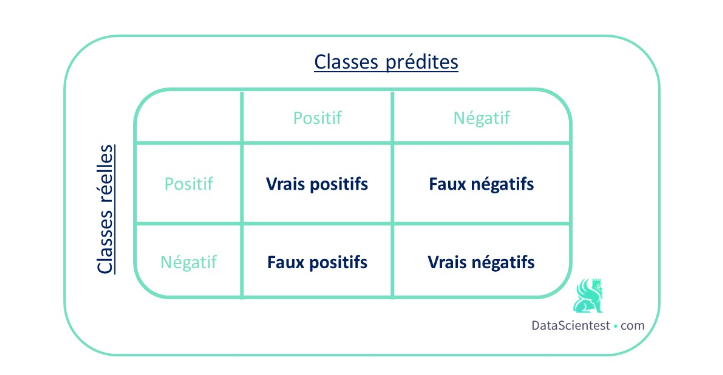


## Entrainement sur les 5 solveurs et évaluation des performances

#### Meilleur modèle

Utilisation du solveur newton-cg
--------------------------------------------------

Hyperparamètres : {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'newton-cg', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Moyenne accuracy: 0.6484840698812392

Moyenne F1_class_2: 0.048281897247383

Moyenne recall_class_2: 0.02563588123255098

Moyenne precision_class_2: 0.4142429390118639

Moyenne precision_macro: 0.5605634165528316

Moyenne precision_micro: 0.6484840698812392

Moyenne precision_weighted: 0.6312378754622665

Moyenne recall_macro: 0.45358105781499813

Moyenne recall_micro: 0.6484840698812392

Moyenne recall_weighted: 0.6484840698812392

Moyenne f1_macro: 0.45881506955268475

Moyenne f1_micro: 0.6484840698812392

Moyenne f1_weighted: 0.6305765406090774

Moyenne roc_auc: 0.8363213075376171

Moyenne matthews_corrco

<Figure size 200x200 with 0 Axes>

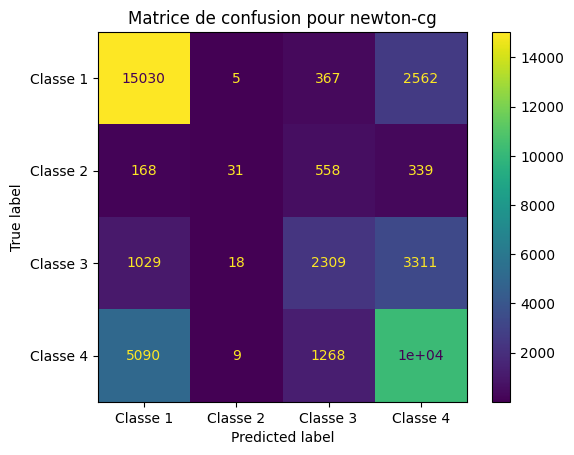

              precision    recall  f1-score   support

           1    0.70507   0.83667   0.76526     17964
           2    0.49206   0.02828   0.05349      1096
           3    0.51288   0.34633   0.41347      6667
           4    0.62196   0.61615   0.61904     16587

    accuracy                        0.65203     42314
   macro avg    0.58299   0.45686   0.46281     42314
weighted avg    0.63669   0.65203   0.63407     42314

Accuracy sur l'ensemble de test : 0.6520300609727278
F1-score sur la classe 2 (test) : 0.053494391716997415
ROC AUC (test) : 0.8376194338399957

****************************************************************************************************

Utilisation du solveur lbfgs
--------------------------------------------------

Hyperparamètres : {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 

<Figure size 200x200 with 0 Axes>

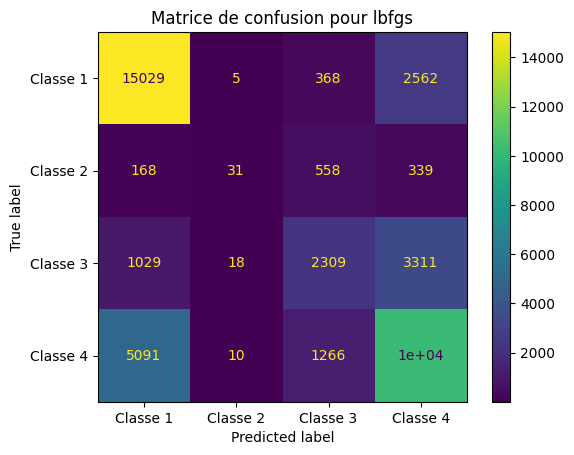

              precision    recall  f1-score   support

           1    0.70502   0.83662   0.76520     17964
           2    0.48438   0.02828   0.05345      1096
           3    0.51300   0.34633   0.41350      6667
           4    0.62196   0.61615   0.61904     16587

    accuracy                        0.65201     42314
   macro avg    0.58109   0.45685   0.46280     42314
weighted avg    0.63649   0.65201   0.63406     42314

Accuracy sur l'ensemble de test : 0.652006428132533
F1-score sur la classe 2 (test) : 0.05344827586206896
ROC AUC (test) : 0.8376157861662132

****************************************************************************************************

Utilisation du solveur liblinear
--------------------------------------------------

Hyperparamètres : {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver'

<Figure size 200x200 with 0 Axes>

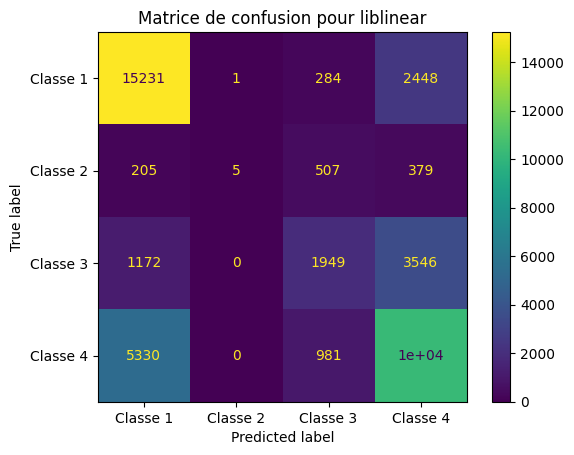

              precision    recall  f1-score   support

           1    0.69427   0.84786   0.76342     17964
           2    0.83333   0.00456   0.00907      1096
           3    0.52378   0.29234   0.37524      6667
           4    0.61721   0.61952   0.61837     16587

    accuracy                        0.64898     42314
   macro avg    0.66715   0.44107   0.44153     42314
weighted avg    0.64081   0.64898   0.62586     42314

Accuracy sur l'ensemble de test : 0.648981424587607
F1-score sur la classe 2 (test) : 0.009074410163339382
ROC AUC (test) : 0.8345721190376001

****************************************************************************************************

Utilisation du solveur sag
--------------------------------------------------

Hyperparamètres : {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'sa

<Figure size 200x200 with 0 Axes>

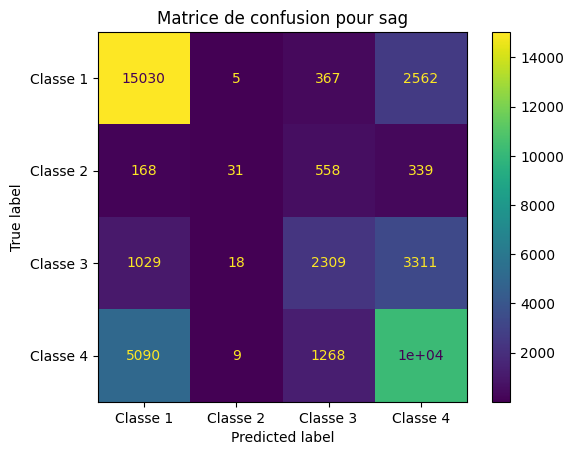

              precision    recall  f1-score   support

           1    0.70507   0.83667   0.76526     17964
           2    0.49206   0.02828   0.05349      1096
           3    0.51288   0.34633   0.41347      6667
           4    0.62196   0.61615   0.61904     16587

    accuracy                        0.65203     42314
   macro avg    0.58299   0.45686   0.46281     42314
weighted avg    0.63669   0.65203   0.63407     42314

Accuracy sur l'ensemble de test : 0.6520300609727278
F1-score sur la classe 2 (test) : 0.053494391716997415
ROC AUC (test) : 0.8376178085063959

****************************************************************************************************

Utilisation du solveur saga
--------------------------------------------------

Hyperparamètres : {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': '

<Figure size 200x200 with 0 Axes>

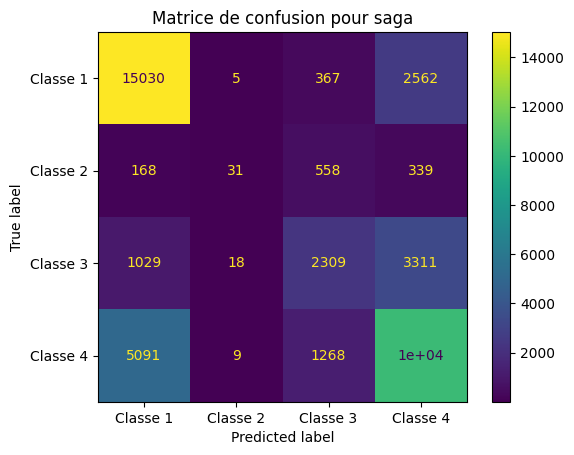

              precision    recall  f1-score   support

           1    0.70504   0.83667   0.76524     17964
           2    0.49206   0.02828   0.05349      1096
           3    0.51288   0.34633   0.41347      6667
           4    0.62193   0.61608   0.61900     16587

    accuracy                        0.65201     42314
   macro avg    0.58298   0.45684   0.46280     42314
weighted avg    0.63667   0.65201   0.63405     42314

Accuracy sur l'ensemble de test : 0.652006428132533
F1-score sur la classe 2 (test) : 0.053494391716997415
ROC AUC (test) : 0.8376158612393614

****************************************************************************************************

Modèles triés par F1-score sur la classe 2 (test) :
newton-cg: F1-Score = 0.053494391716997415, Accuracy = 0.6520300609727278, ROC AUC = 0.8376194338399957
sag: F1-Score = 0.053494391716997415, Accuracy = 0.6520300609727278, ROC AUC = 0.8376178085063959
saga: F1-Score = 0.053494391716997415, Accuracy = 0.6520064281325

In [41]:
df = pd.read_csv('data/dataset_18-21_for_model_encoding.csv', sep=',', index_col=0)
X = df.drop(['grav'], axis=1)
y = df['grav']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101, stratify=y)

# Binarisation pour ROC AUC
y_train_bin = label_binarize(y_train, classes=[1, 2, 3, 4])
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4])

# Liste de solveurs à tester
solveurs = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
model_results = []

# Hyperparamètres
C_value = 1.0
max_iter_value = 1000

# Pour stocker les résultats du F1-score sur le jeu de test
f1_scores = {}

# Fonction de scoring personnalisée avec le label 2
def my_metric(y_true, y_pred):
    f1_score_class_2 = f1_score(y_true, y_pred, labels=[2], average=None)[0]
    f1_score_class_3 = f1_score(y_true, y_pred, labels=[3], average=None)[0]
    return (1.5 * f1_score_class_2 + f1_score_class_3) / 2.5

def f1_score_class_2(y_true, y_pred):
    return f1_score(y_true, y_pred, labels=[2], average=None)[0]

def recall_score_class_2(y_true, y_pred):
    return recall_score(y_true, y_pred, labels=[2], average=None)[0]

def precision_score_class_2(y_true, y_pred):
    return precision_score(y_true, y_pred, labels=[2], average=None)[0]

# dictionnaire de scoring

scoring = {
    'accuracy': 'accuracy',
    'F1_class_2': make_scorer(f1_score_class_2),
    'recall_class_2': make_scorer(recall_score_class_2),
    'precision_class_2': make_scorer(precision_score_class_2),
    
    'precision_macro': make_scorer(precision_score, average='macro'),
    'precision_micro': make_scorer(precision_score, average='micro'),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'recall_micro': make_scorer(recall_score, average='micro'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'f1_micro': make_scorer(f1_score, average='micro'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'roc_auc': 'roc_auc_ovr',
    'matthews_corrcoef': make_scorer(matthews_corrcoef),
    'Cust_metric': make_scorer(my_metric)
}

# Boucle à travers chaque solveur
for solveur in solveurs:
    print(f"Utilisation du solveur {solveur}")
    print("-"*50 + "\n")
    
    clf = LogisticRegression(solver=solveur, C=C_value, max_iter=max_iter_value)
    print("Hyperparamètres :", clf.get_params())
    
    # Utilisation de cross_validate pour obtenir plusieurs métriques
    cv_results = cross_validate(clf, X_train, y_train, cv=3, scoring=scoring)
  
    # Affichage des moyennes pour toutes les métriques
    for metric in scoring.keys():
        mean_score = np.mean(cv_results['test_' + metric])
        print(f"Moyenne {metric}: {mean_score}\n")
    
    # Entraînement du modèle sur les données d'entraînement
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    y_test_prob_bin = clf.predict_proba(X_test)
    
    # Enregistrement du modèle
    joblib.dump(clf, f"modeles_fabien/{solveur}_model.joblib")
    
    # Matrice de confusion
    plt.figure(figsize=(2, 2))
    cm = confusion_matrix(y_test, y_test_pred, labels=[1, 2, 3, 4])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 1", "Classe 2", "Classe 3", "Classe 4"], )
    disp.plot()
    plt.title(f"Matrice de confusion pour {solveur}")
    plt.show()
    
    # Rapport de classification
    print(classification_report(y_test, y_test_pred, labels=[1, 2, 3, 4], digits=5))
   
    # Calcul des métriques sur le jeu de test
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average=None, labels=[1, 2, 3, 4])[1]
    test_roc_auc_ovr = roc_auc_score(y_test_bin, y_test_prob_bin, multi_class="ovr", average="macro")
   
    print(f"Accuracy sur l'ensemble de test : {test_accuracy}")
    print(f"F1-score sur la classe 2 (test) : {test_f1}")
    print(f"ROC AUC (test) : {test_roc_auc_ovr}")
    
    # Ajout des résultats à model_results
    model_results.append((solveur, test_f1, test_accuracy, test_roc_auc_ovr))

    print("\n" + "*"*100 + "\n")

# Tri des modèles par F1-score sur l'ensemble de test
model_results.sort(key=lambda x: x[1], reverse=True)

# Affichage des modèles triés
print("Modèles triés par F1-score sur la classe 2 (test) :")
for solveur, f1, test_accuracy, roc_auc in model_results:
    print(f"{solveur}: F1-Score = {f1}, Accuracy = {test_accuracy}, ROC AUC = {roc_auc}")

# Temps d'éxécution = 65m 1.9s
    

Le meilleur solveur est : newton-cg


<Figure size 200x200 with 0 Axes>

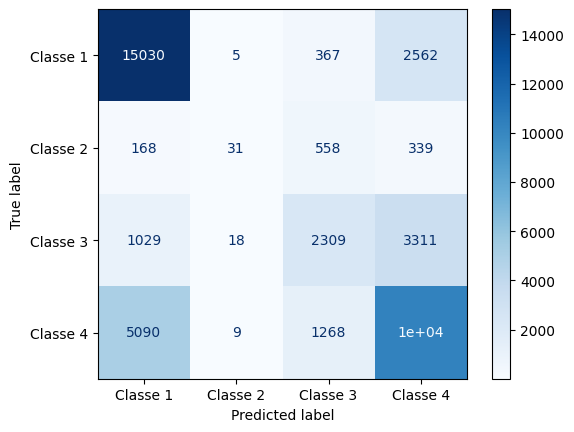

              precision    recall  f1-score   support

           1    0.70507   0.83667   0.76526     17964
           2    0.49206   0.02828   0.05349      1096
           3    0.51288   0.34633   0.41347      6667
           4    0.62196   0.61615   0.61904     16587

    accuracy                        0.65203     42314
   macro avg    0.58299   0.45686   0.46281     42314
weighted avg    0.63669   0.65203   0.63407     42314



['modeles_fabien/newton-cg_best_model.joblib']

In [42]:
# Affichage du nom du meilleur solveur
best_solver = model_results[0][0]
print(f"Le meilleur solveur est : {best_solver}")

# Réentraînement du modèle en utilisant le meilleur solveur
best_model = LogisticRegression(solver=best_solver, C=C_value, max_iter=max_iter_value)
best_model.fit(X_train, y_train)

# Matrice de confusion pour le meilleur modèle
y_test_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred, labels=[1, 2, 3, 4])
plt.figure(figsize=(2, 2))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 1", "Classe 2", "Classe 3", "Classe 4"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Rapport de classification
print(classification_report(y_test, y_test_pred, labels=[1, 2, 3, 4], digits=5))

# Suvegarde du modèle du meilleur solveur
joblib.dump(best_model, f"modeles_fabien/{best_solver}_best_model.joblib")

#### Courbe ROC

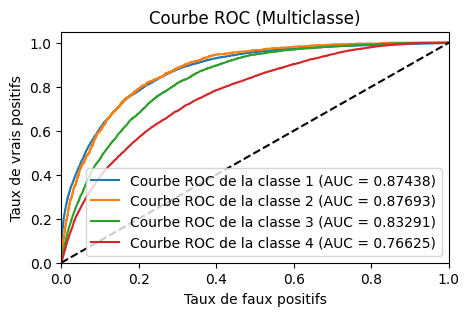

In [43]:
# Chargement du modèle
best_model = joblib.load(f"modeles_fabien/newton-cg_model.joblib")
y_test_pred = best_model.predict(X_test)

# Binarisation des étiquettes dans un format one-vs-all
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4])

# Calcul des probabilités de classe
y_score = best_model.predict_proba(X_test)

n_classes = 4  # Nombre de classes
fpr = dict()
tpr = dict()
1
roc_auc = dict()

# Calcul de la courbe ROC et de l'AUC pour chaque classe
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_score[:, i])

# Tracage de la courbe ROC pour chaque classe
plt.figure(figsize=(5, 3))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Courbe ROC de la classe {i + 1} (AUC = {roc_auc[i]:.5f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC (Multiclasse)')
plt.legend(loc="lower right")
plt.show()

## 3. GridSearchCV sans échantillonage pour trouver les meilleurs Hyper-Paramètres

#### Résultats bruts

In [34]:
def my_metric(y_true, y_pred):
    f1_score_class_2 = f1_score(y_true, y_pred, labels=[2], average=None)[0]
    f1_score_class_3 = f1_score(y_true, y_pred, labels=[3], average=None)[0]
    return (1.5 * f1_score_class_2 + f1_score_class_3) / 2.5

def f1_score_class_2(y_true, y_pred):
    return f1_score(y_true, y_pred, labels=[2], average=None)

def recall_score_class_2(y_true, y_pred):
    return recall_score(y_true, y_pred, labels=[2], average=None)

def precision_score_class_2(y_true, y_pred):
    return precision_score(y_true, y_pred, labels=[2], average=None)

scoring = {
    'accuracy': 'accuracy',
    'F1_class_2': make_scorer(f1_score_class_2),
    'recall_class_2': make_scorer(recall_score_class_2),
    'precision_class_2': make_scorer(precision_score_class_2),
    
    'precision_macro': make_scorer(precision_score, average='macro'),
    'precision_micro': make_scorer(precision_score, average='micro'),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'recall_micro': make_scorer(recall_score, average='micro'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'f1_micro': make_scorer(f1_score, average='micro'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'roc_auc': 'roc_auc_ovr',
    'matthews_corrcoef': make_scorer(matthews_corrcoef),
    'Cust_metric': make_scorer(my_metric)
}

param_grid = [
    {
        'penalty': ['l1'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr"]
    },
    {
        'penalty': ['l2'],
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr", "multinomial"]
    },
    {
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr", "multinomial"],
        'l1_ratio': [0.0, 0.5, 1.0]
    },
    {
        'penalty': [None],
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'multi_class': ["ovr", "multinomial"]
    }
]

log_model = LogisticRegression(random_state=42)
grid_model = GridSearchCV(log_model, param_grid, cv=3, verbose=2, n_jobs=-1, scoring=scoring, refit=False)
grid_model.fit(X_train, y_train)

# Conversion des résultats en DataFrame
results_df = pd.DataFrame(grid_model.cv_results_)

# Sauvegarde du DataFrame en fichier CSV
results_df.to_csv('resultats_fabien/grid_search_results_brut.csv')

# Affichage des premières lignes du DataFrame
print(results_df.head())
# 2020m 8.3s

Fitting 3 folds for each of 264 candidates, totalling 792 fits
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0      20.319274      1.925166         1.966339        0.171459   0.001   
1      90.038430      2.891201         1.353271        0.047136   0.001   
2      18.003610      4.192170         1.680557        0.135261   0.001   
3      86.353854      3.237255         1.931447        0.145548   0.001   
4      10.385298      0.451250         1.477856        0.084665   0.001   

  param_max_iter param_multi_class param_penalty param_solver param_l1_ratio  \
0           1000               ovr            l1    liblinear            NaN   
1           1000               ovr            l1         saga            NaN   
2          10000               ovr            l1    liblinear            NaN   
3          10000               ovr            l1         saga            NaN   
4         100000               ovr            l1    liblinear            NaN   

     

#### Résultat net

In [35]:
# Chargement du fichier CSV
resultats = pd.read_csv('resultats_fabien/grid_search_results_brut.csv')

# Extraction des colonnes 'param_' du dataframe de résultats
colonnes_parametres = [col for col in resultats.columns if col.startswith('param_')]
df_param = resultats[colonnes_parametres]

# Renommage des colonnes de df_param
noms_parametres = [col.replace('param_', '') for col in colonnes_parametres]
df_param.columns = noms_parametres

# Extraction des colonnes 'param_' du dataframe de résultats
colonnes_scoring = [col for col in resultats.columns if col.startswith('mean_test_')]
df_scoring = resultats[colonnes_scoring]

# Renommage des colonnes de df_scoring
noms_scoring = [col.replace('mean_test_', '') for col in colonnes_scoring]
df_scoring.columns = noms_scoring

# Concatenation des deux dataframe
df_resultat = pd.concat([df_param, df_scoring], axis=1)

# Sauvegarde du DataFrame en fichier CSV
path = 'resultats_fabien/grid_search_results_net.csv'
df_resultat.to_csv(path, index=False)

# Afficher les premières lignes du DataFrame
df_resultat.head(10)

,C,max_iter,multi_class,penalty,solver,l1_ratio,accuracy,F1_class_2,recall_class_2,precision_class_2,precision_macro,precision_micro,precision_weighted,recall_macro,recall_micro,recall_weighted,f1_macro,f1_micro,f1_weighted,roc_auc,matthews_corrcoef,Cust_metric
0,0.001,1000,ovr,l1,liblinear,NaN,0.620067,0.0,0.0,0.0,0.439667,0.620067,0.588255,0.398120,0.620067,0.620067,0.387037,0.620067,0.579600,0.793001,0.379270,0.087836
1,0.001,1000,ovr,l1,saga,NaN,0.621130,0.0,0.0,0.0,0.442932,0.621130,0.590561,0.399346,0.621130,0.621130,0.388837,0.621130,0.581219,0.791129,0.380794,0.089949
2,0.001,10000,ovr,l1,liblinear,NaN,0.620067,0.0,0.0,0.0,0.439667,0.620067,0.588255,0.398120,0.620067,0.620067,0.387037,0.620067,0.579600,0.793001,0.379270,0.087836
3,0.001,10000,ovr,l1,saga,NaN,0.621130,0.0,0.0,0.0,0.442932,0.621130,0.590561,0.399346,0.621130,0.621130,0.388837,0.621130,0.581219,0.791129,0.380794,0.089949
4,0.001,100000,ovr,l1,liblinear,NaN,0.620067,0.0,0.0,0.0,0.439667,0.620067,0.588255,0.398120,0.620067,0.620067,0.387037,0.620067,0.579600,0.793001,0.379270,0.087836
5,0.001,100000,ovr,l1,saga,NaN,0.621130,0.0,0.0,0.0,0.442932,0.621130,0.590561,0.399346,0.621130,0.621130,0.388837,0.621130,0.581219,0.791129,0.380794,0.089949
6,0.010,1000,ovr,l1,liblinear,NaN,0.641124,0.0,0.0,0.0,0.452969,0.641124,0.610556,0.429825,0.641124,0.641124,0.428059,0.641124,0.614938,0.825813,0.417958,0.138033
7,0.010,1000,ovr,l1,saga,NaN,0.641258,0.0,0.0,0.0,0.452978,0.641258,0.610665,0.429988,0.641258,0.641258,0.428225,0.641258,0.615107,0.826154,0.418218,0.138195
8,0.010,10000,ovr,l1,liblinear,NaN,0.641124,0.0,0.0,0.0,0.452969,0.641124,0.610556,0.429825,0.641124,0.641124,0.428059,0.641124,0.614938,0.825813,0.417958,0.138033
9,0.010,10000,ovr,l1,saga,NaN,0.641258,0.0,0.0,0.0,0.452978,0.641258,0.610665,0.429988,0.641258,0.641258,0.428225,0.641258,0.615107,0.826154,0.418218,0.138195


#### Résultats Max

In [38]:
# Index des maxima des différents scoring
index_max_MCC = df_resultat['matthews_corrcoef'].idxmax()
index_max_F1_class_2 = df_resultat['F1_class_2'].idxmax()
index_max_recall_class_2 = df_resultat['recall_class_2'].idxmax()
index_max_precision_class_2 = df_resultat['precision_class_2'].idxmax()
index_max_cust = df_resultat['Cust_metric'].idxmax()

index_max_recall_macro = df_resultat['recall_macro'].idxmax()
index_max_recall_micro = df_resultat['recall_micro'].idxmax()
index_max_recall_weighted = df_resultat['recall_weighted'].idxmax()
index_max_f1_macro = df_resultat['f1_macro'].idxmax()
index_max_f1_micro = df_resultat['f1_micro'].idxmax()
index_max_f1_weighted = df_resultat['f1_weighted'].idxmax()

# Extraction des lignes correspondantes
df_resultat_max = df_resultat.loc[[index_max_F1_class_2, index_max_recall_class_2, index_max_precision_class_2,index_max_MCC,
                             index_max_cust, index_max_recall_macro, index_max_recall_micro, index_max_recall_weighted,
                             index_max_f1_macro, index_max_f1_micro, index_max_f1_weighted]]

# Affichage
df_resultat_max.head()

# Sauvegarde du DataFrame en fichier CSV
path = 'resultats_fabien/grid_search_results_max.csv'
df_resultat_max.to_csv(path, index=False)

#### Entrainement du modèle avec les meilleurs paramètres

Les meilleurs hyperparamètres sont :
{'max_iter': 1000, 'multi_class': 'multinomial', 'solver': 'saga'}


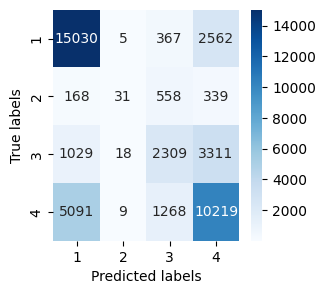

              precision    recall  f1-score   support

     Class 1    0.70504   0.83667   0.76524     17964
     Class 2    0.49206   0.02828   0.05349      1096
     Class 3    0.51288   0.34633   0.41347      6667
     Class 4    0.62193   0.61608   0.61900     16587

    accuracy                        0.65201     42314
   macro avg    0.58298   0.45684   0.46280     42314
weighted avg    0.63667   0.65201   0.63405     42314



In [36]:
# Chargement du fichier CSV
results_df = pd.read_csv('resultats_fabien/grid_search_results_max.csv')

# Récupération de l'index du meilleur score pour "mean_test_F1_class_2"
best_index = results_df['F1_class_2'].idxmax()

# Récupération de la ligne correspondant au meilleur index
best_row = results_df.iloc[best_index]

# Extraction et affichage des hyperparamètres
best_params = {
    "max_iter": best_row['max_iter'],
    "multi_class": best_row['multi_class'],
    "solver": best_row['solver'],
}

# Ajout conditionnel des hyperparamètres s'ils ne sont pas None
for param in ['l1_ratio', 'C', 'penalty']:
    if param in best_row and not pd.isna(best_row[param]):
        best_params[param] = best_row[param]

# Impression des meilleurs hyperparamètres
print("Les meilleurs hyperparamètres sont :")
print(best_params)

# Entraînement du modèle avec les meilleurs paramètres trouvés

log_model_best = LogisticRegression(**best_params, random_state=42)
log_model_best.fit(X_train, y_train)
y_pred = log_model_best.predict(X_test)

# Enregistrement du modèle
joblib.dump(log_model_best, f"modeles_fabien/best_grid_model.joblib")

# Affichage de la matrice de confusion
labels = [1, 2, 3, 4]
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Rapport de classification
report = classification_report(y_test, y_pred, labels=labels, target_names=["Class 1", "Class 2", "Class 3", "Class 4"], digits = 5)
print(report)

# temps d'éxécution = 5m 5.4s

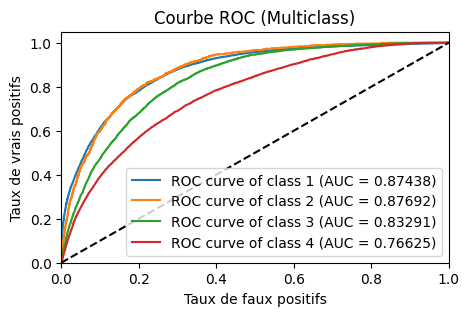

In [37]:
# Binarisation des étiquettes dans un format one-vs-all
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4])
y_score = log_model_best.predict_proba(X_test)

n_classes = 4
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calcul de la courbe ROC et de l'AUC pour chaque classe
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_score[:, i])

# Tracage de la courbe ROC pour chaque classe
plt.figure(figsize=(5, 3))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i+1} (AUC = {roc_auc[i]:.5f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC (Multiclass)')
plt.legend(loc="lower right")
plt.show()

## 4. GridSearchCV Undersampling pour trouver les meilleurs Hyper-Paramètres

In [22]:
rus = RandomUnderSampler()
X_train_us, y_train_us = rus.fit_resample(X_train, y_train)

#### Résultats bruts

In [19]:
def my_metric(y_true, y_pred):
    f1_score_class_2 = f1_score(y_true, y_pred, labels=[2], average=None)[0]
    f1_score_class_3 = f1_score(y_true, y_pred, labels=[3], average=None)[0]
    return (1.5 * f1_score_class_2 + f1_score_class_3) / 2.5

def f1_score_class_2(y_true, y_pred):
    return f1_score(y_true, y_pred, labels=[2], average=None)

def recall_score_class_2(y_true, y_pred):
    return recall_score(y_true, y_pred, labels=[2], average=None)

def precision_score_class_2(y_true, y_pred):
    return precision_score(y_true, y_pred, labels=[2], average=None)

scoring = {
    'accuracy': 'accuracy',
    'F1_class_2': make_scorer(f1_score_class_2),
    'recall_class_2': make_scorer(recall_score_class_2),
    'precision_class_2': make_scorer(precision_score_class_2),
    
    'precision_macro': make_scorer(precision_score, average='macro'),
    'precision_micro': make_scorer(precision_score, average='micro'),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'recall_micro': make_scorer(recall_score, average='micro'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'f1_micro': make_scorer(f1_score, average='micro'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'roc_auc': 'roc_auc_ovr',
    'matthews_corrcoef': make_scorer(matthews_corrcoef),
    'Cust_metric': make_scorer(my_metric)
}

param_grid = [
    {
        'penalty': ['l1'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr"] 
    },
    {
        'penalty': ['l2'],
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr", "multinomial"]
    },
    {
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr", "multinomial"],
        'l1_ratio': [0.0, 0.5, 1.0] 
    },
    {
        'penalty': [None],
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'multi_class': ["ovr", "multinomial"]
    }
]

log_model = LogisticRegression(random_state=42)
grid_model = GridSearchCV(log_model, param_grid, cv=3, verbose=2, n_jobs=-1, scoring=scoring, refit=False)
grid_model.fit(X_train_us, y_train_us)

# Conversion des résultats en DataFrame
results_df = pd.DataFrame(grid_model.cv_results_)

# Sauvegarde du DataFrame en fichier CSV
results_df.to_csv('resultats_fabien/grid_search_under_results_brut.csv')

# Affichage des premières lignes du DataFrame
print(results_df.head())

# 206m 29.3s

Fitting 3 folds for each of 264 candidates, totalling 792 fits
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C   
0       0.565344      0.024281         0.176018        0.010227   0.001  \
1       6.503968      0.159043         0.188097        0.008203   0.001   
2       0.519940      0.054189         0.167056        0.007070   0.001   
3       6.706371      0.173688         0.203882        0.010300   0.001   
4       0.456041      0.042610         0.216916        0.034497   0.001   

  param_max_iter param_multi_class param_penalty param_solver param_l1_ratio   
0           1000               ovr            l1    liblinear            NaN  \
1           1000               ovr            l1         saga            NaN   
2          10000               ovr            l1    liblinear            NaN   
3          10000               ovr            l1         saga            NaN   
4         100000               ovr            l1    liblinear            NaN   

     

#### Résultat net

In [23]:
# Chargement du fichier CSV
resultats = pd.read_csv('resultats_fabien/grid_search_under_results_brut.csv')

# Extraction des colonnes 'param_' du dataframe de résultats
colonnes_parametres = [col for col in resultats.columns if col.startswith('param_')]
df_param = resultats[colonnes_parametres]

# Renommage des colonnes de df_param
noms_parametres = [col.replace('param_', '') for col in colonnes_parametres]
df_param.columns = noms_parametres

# Extraction des colonnes 'param_' du dataframe de résultats
colonnes_scoring = [col for col in resultats.columns if col.startswith('mean_test_')]
df_scoring = resultats[colonnes_scoring]

# Renommage des colonnes de df_scoring
noms_scoring = [col.replace('mean_test_', '') for col in colonnes_scoring]
df_scoring.columns = noms_scoring

# Concatenation des deux dataframe
df_resultat = pd.concat([df_param, df_scoring], axis=1)

# Sauvegarde du DataFrame en fichier CSV
path = 'resultats_fabien/grid_search_under_results_net.csv' # Vous pouvez changer ce chemin selon vos besoins
df_resultat.to_csv(path, index=False)

# Afficher les premières lignes du DataFrame
df_resultat.head(10)

,C,max_iter,multi_class,penalty,solver,l1_ratio,accuracy,F1_class_2,recall_class_2,precision_class_2,precision_macro,precision_micro,precision_weighted,recall_macro,recall_micro,recall_weighted,f1_macro,f1_micro,f1_weighted,roc_auc,matthews_corrcoef,Cust_metric
0,0.001,1000,ovr,l1,liblinear,NaN,0.433175,0.496243,0.556996,0.447523,0.415767,0.433175,0.415766,0.433174,0.433175,0.433175,0.403932,0.433175,0.403933,0.699941,0.251665,0.438468
1,0.001,1000,ovr,l1,saga,NaN,0.412833,0.496007,0.718206,0.379241,0.365563,0.412833,0.365563,0.412833,0.412833,0.412833,0.345590,0.412833,0.345591,0.664782,0.237465,0.306456
2,0.001,10000,ovr,l1,liblinear,NaN,0.433175,0.496243,0.556996,0.447523,0.415767,0.433175,0.415766,0.433174,0.433175,0.433175,0.403932,0.433175,0.403933,0.699941,0.251665,0.438468
3,0.001,10000,ovr,l1,saga,NaN,0.412833,0.496007,0.718206,0.379241,0.365563,0.412833,0.365563,0.412833,0.412833,0.412833,0.345590,0.412833,0.345591,0.664782,0.237465,0.306456
4,0.001,100000,ovr,l1,liblinear,NaN,0.433175,0.496243,0.556996,0.447523,0.415767,0.433175,0.415766,0.433174,0.433175,0.433175,0.403932,0.433175,0.403933,0.699941,0.251665,0.438468
5,0.001,100000,ovr,l1,saga,NaN,0.412833,0.496007,0.718206,0.379241,0.365563,0.412833,0.365563,0.412833,0.412833,0.412833,0.345590,0.412833,0.345591,0.664782,0.237465,0.306456
6,0.010,1000,ovr,l1,liblinear,NaN,0.516846,0.554798,0.607763,0.510366,0.502081,0.516846,0.502081,0.516846,0.516846,0.516846,0.498598,0.516846,0.498598,0.783614,0.360998,0.472948
7,0.010,1000,ovr,l1,saga,NaN,0.520443,0.561158,0.619111,0.513158,0.505920,0.520443,0.505919,0.520443,0.520443,0.520443,0.502282,0.520443,0.502282,0.784596,0.365829,0.477706
8,0.010,10000,ovr,l1,liblinear,NaN,0.516846,0.554798,0.607763,0.510366,0.502081,0.516846,0.502081,0.516846,0.516846,0.516846,0.498598,0.516846,0.498598,0.783614,0.360998,0.472948
9,0.010,10000,ovr,l1,saga,NaN,0.520443,0.561158,0.619111,0.513158,0.505920,0.520443,0.505919,0.520443,0.520443,0.520443,0.502282,0.520443,0.502282,0.784596,0.365829,0.477706


#### Résultats max

In [24]:
# Index des maxima des différents scoring
index_max_MCC = df_resultat['matthews_corrcoef'].idxmax()
index_max_F1_class_2 = df_resultat['F1_class_2'].idxmax()
index_max_recall_class_2 = df_resultat['recall_class_2'].idxmax()
index_max_precision_class_2 = df_resultat['precision_class_2'].idxmax()
index_max_cust = df_resultat['Cust_metric'].idxmax()

index_max_recall_macro = df_resultat['recall_macro'].idxmax()
index_max_recall_micro = df_resultat['recall_micro'].idxmax()
index_max_recall_weighted = df_resultat['recall_weighted'].idxmax()
index_max_f1_macro = df_resultat['f1_macro'].idxmax()
index_max_f1_micro = df_resultat['f1_micro'].idxmax()
index_max_f1_weighted = df_resultat['f1_weighted'].idxmax()

# Extraction des lignes correspondantes
df_resultat_max = df_resultat.loc[[index_max_F1_class_2, index_max_recall_class_2, index_max_precision_class_2,index_max_MCC,
                             index_max_cust, index_max_recall_macro, index_max_recall_micro, index_max_recall_weighted,
                             index_max_f1_macro, index_max_f1_micro, index_max_f1_weighted]]

# Affichage
df_resultat_max.head()

# Sauvegarde du DataFrame en fichier CSV
path = 'resultats_fabien/grid_search_under_results_max.csv'
df_resultat_max.to_csv(path, index=False)

#### Entrainement du modèle avec les meilleurs paramètres

Les meilleurs hyperparamètres sont :
{'C': 1.0, 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'sag', 'l1_ratio': None}


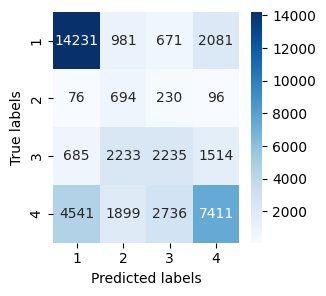

In [25]:
# Chargement du fichier CSV
results_df = pd.read_csv('resultats_fabien/grid_search_under_results_max.csv')

# Index du meilleur score pour "mean_test_F1_class_2"
best_index = results_df['F1_class_2'].idxmax()

# Récupération de la ligne correspondant au meilleur index
best_row = results_df.iloc[best_index]

# Extraction et affichage des hyperparamètres
best_params = {
    "C": best_row['C'],
    "max_iter": best_row['max_iter'],
    "multi_class": best_row['multi_class'],
    "penalty": best_row['penalty'],
    "solver": best_row['solver'],
    "l1_ratio": best_row['l1_ratio'] if not pd.isna(best_row['l1_ratio']) else None
}

# Impression des meilleurs hyperparamètres
print("Les meilleurs hyperparamètres sont :")
print(best_params)

# Entraînement du modèle avec les meilleurs paramètres trouvés
log_model_best = LogisticRegression(**best_params, random_state=42)
log_model_best.fit(X_train_us, y_train_us)

# Enregistrement du modèle
joblib.dump(log_model_best, f"modeles_fabien/best_grid_under_model.joblib")

# Prédiction des classes pour votre ensemble de test
y_pred = log_model_best.predict(X_test)

# Calcul de la matrice de confusion en spécifiant les labels
labels = [1, 2, 3, 4]
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

# Affichage de la matrice de confusion avec les labels appropriés
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# temps d'éxécution = 1m 3.1s

In [26]:
# Rapport de classification
report = classification_report(y_test, y_pred, labels=[1, 2, 3, 4], target_names=["Class 1", "Class 2", "Class 3", "Class 4"], digits=5)
print(report)

              precision    recall  f1-score   support

     Class 1    0.72856   0.79220   0.75905     17964
     Class 2    0.11951   0.63321   0.20107      1096
     Class 3    0.38062   0.33523   0.35649      6667
     Class 4    0.66754   0.44680   0.53530     16587

    accuracy                        0.58068     42314
   macro avg    0.47406   0.55186   0.46298     42314
weighted avg    0.63404   0.58068   0.59346     42314



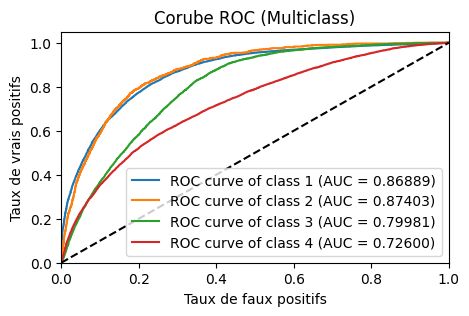

In [27]:
# Binarisation des étiquettes dans un format one-vs-all
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4])
y_score = log_model_best.predict_proba(X_test)

n_classes = 4
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calcul de la courbe ROC et de l'AUC pour chaque classe
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_score[:, i])

# Tracage de la courbe ROC pour chaque classe
plt.figure(figsize=(5, 3))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i+1} (AUC = {roc_auc[i]:.5f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Corube ROC (Multiclass)')
plt.legend(loc="lower right")
plt.show()

In [28]:
# Obtention des coefficients
coefficients = log_model_best.coef_

# Création d'un DataFrame pour afficher les coefficients
coeff_df = pd.DataFrame(coefficients, columns = X_train.columns)
import matplotlib.pyplot as plt
import numpy as np

# Obtention des coefficients
coefficients = log_model_best.coef_[0]

# Création d'un DataFrame pour afficher les coefficients absolus
abs_coeff_df = pd.DataFrame(np.abs(coefficients), index = X_train.columns, columns=['Abs_Coefficient'])

# Tri des valeurs par importance
sorted_coeff_df = abs_coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

sorted_coeff_df.head(10)

,Abs_Coefficient
catu_3,6.210170
obsm_1.0,3.902881
obs_2.0,1.990774
catv_2.0,1.977487
catv_4.0,1.946671
obs_6.0,1.807098
catv_3.0,1.771749
manv_22.0,1.675470
obsm_9.0,1.576337
catv_5.0,1.564683


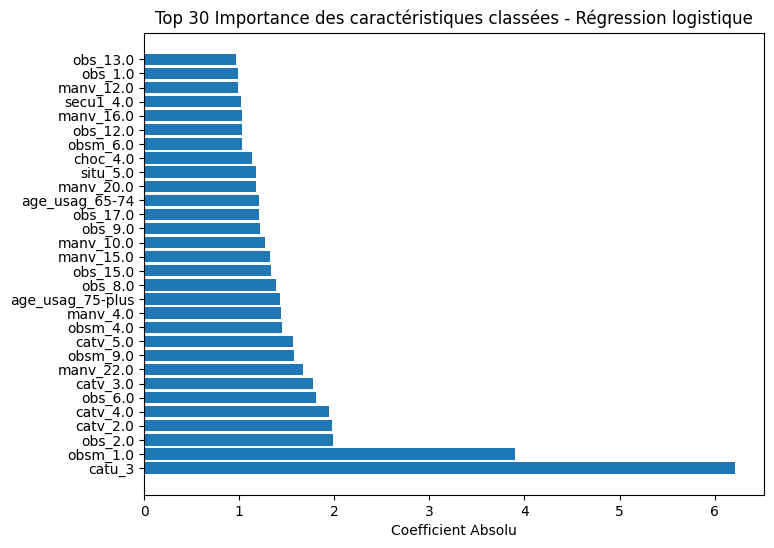

In [29]:
# Sélection des 30 premières valeurs
top_30_df = sorted_coeff_df.head(30)

# graphique à barres horizontales des coefficients
plt.figure(figsize=(8, 6))
plt.barh(top_30_df.index, top_30_df['Abs_Coefficient'])
plt.xlabel('Coefficient Absolu')
plt.title('Top 30 Importance des caractéristiques classées - Régression logistique')
plt.show()


## 5. RandomSearchCV Oversampling pour trouver les meilleurs Hyper-Paramètres

In [30]:
ros = RandomOverSampler()
X_train_os, y_train_os = ros.fit_resample(X_train, y_train)

#### Résultats bruts

In [ ]:
def my_metric(y_true, y_pred):
    f1_score_class_2 = f1_score(y_true, y_pred, labels=[2], average=None)[0]
    f1_score_class_3 = f1_score(y_true, y_pred, labels=[3], average=None)[0]
    return (1.5 * f1_score_class_2 + f1_score_class_3) / 2.5

def f1_score_class_2(y_true, y_pred):
    return f1_score(y_true, y_pred, labels=[2], average=None)

def recall_score_class_2(y_true, y_pred):
    return recall_score(y_true, y_pred, labels=[2], average=None)

def precision_score_class_2(y_true, y_pred):
    return precision_score(y_true, y_pred, labels=[2], average=None)

scoring = {
    'accuracy': 'accuracy',
    'F1_class_2': make_scorer(f1_score_class_2),
    'recall_class_2': make_scorer(recall_score_class_2),
    'precision_class_2': make_scorer(precision_score_class_2),
    
    'precision_macro': make_scorer(precision_score, average='macro'),
    'precision_micro': make_scorer(precision_score, average='micro'),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'recall_micro': make_scorer(recall_score, average='micro'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'f1_micro': make_scorer(f1_score, average='micro'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'roc_auc': 'roc_auc_ovr', 
    'matthews_corrcoef': make_scorer(matthews_corrcoef),
    'Cust_metric': make_scorer(my_metric)
}

param_grid = [
    {
        'penalty': ['l1'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr"]
    },
    {
        'penalty': ['l2'],
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr", "multinomial"]
    },
    {
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr", "multinomial"],
        'l1_ratio': [0.0, 0.5, 1.0]
    },
    {
        'penalty': [None],
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'multi_class': ["ovr", "multinomial"]
    }
]

log_model = LogisticRegression(random_state=42)
random_search = RandomizedSearchCV(log_model, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, n_jobs=-1, scoring=scoring, refit=False)
random_search.fit(X_train_os, y_train_os)

# Conversion les résultats en DataFrame
results_df = pd.DataFrame(random_search.cv_results_)

# Sauvegarde du DataFrame en fichier CSV
results_df.to_csv('resultats_fabien/random_search_over_results_brut.csv')

# Affichage des premières lignes du DataFrame
print(results_df.head())

# 394m 27.1s

#### Résultat net

In [16]:
# Chargement du fichier CSV
resultats = pd.read_csv('resultats_fabien/random_search_over_results_brut.csv')

# Extraction des colonnes 'param_' du dataframe de résultats
colonnes_parametres = [col for col in resultats.columns if col.startswith('param_')]
df_param = resultats[colonnes_parametres]

# Renommage des colonnes de df_param
noms_parametres = [col.replace('param_', '') for col in colonnes_parametres]
df_param.columns = noms_parametres

# Extraction des colonnes 'param_' du dataframe de résultats
colonnes_scoring = [col for col in resultats.columns if col.startswith('mean_test_')]
df_scoring = resultats[colonnes_scoring]

# Renommage des colonnes de df_scoring
noms_scoring = [col.replace('mean_test_', '') for col in colonnes_scoring]
df_scoring.columns = noms_scoring

# Concatenation des deux dataframe
df_resultat = pd.concat([df_param, df_scoring], axis=1)

# Sauvegarde du DataFrame en fichier CSV
path = 'resultats_fabien/random_search_over_results_net.csv' # Vous pouvez changer ce chemin selon vos besoins
df_resultat.to_csv(path, index=False)

# Afficher les premières lignes du DataFrame
df_resultat.head(10)

,solver,penalty,multi_class,max_iter,C,l1_ratio,accuracy,F1_class_2,recall_class_2,precision_class_2,precision_macro,precision_micro,precision_weighted,recall_macro,recall_micro,recall_weighted,f1_macro,f1_micro,f1_weighted,roc_auc,matthews_corrcoef,Cust_metric
0,saga,l2,ovr,10000,0.001,NaN,0.547473,0.590328,0.637311,0.549798,0.534822,0.547473,0.534822,0.547473,0.547473,0.547473,0.534216,0.547473,0.534216,0.801333,0.400081,0.509156
1,newton-cg,l2,multinomial,1000,10.000,NaN,0.558366,0.595488,0.621346,0.571699,0.547634,0.558366,0.547634,0.558366,0.558366,0.558366,0.549824,0.558366,0.549824,0.813388,0.412742,0.523179
2,saga,elasticnet,ovr,1000,0.100,0.5,0.557619,0.599300,0.643997,0.560406,0.545401,0.557619,0.545401,0.557619,0.557619,0.557619,0.545784,0.557619,0.545784,0.809310,0.413042,0.518988
3,newton-cg,NaN,ovr,10000,NaN,NaN,0.557710,0.599213,0.643706,0.560473,0.545546,0.557710,0.545546,0.557710,0.557710,0.557710,0.545998,0.557710,0.545998,0.809387,0.413117,0.519094
4,saga,l2,multinomial,1000,1.000,NaN,0.558344,0.595407,0.621228,0.571649,0.547610,0.558344,0.547610,0.558344,0.558344,0.558344,0.549801,0.558344,0.549801,0.813384,0.412714,0.523095
5,liblinear,l1,ovr,1000,1.000,NaN,0.557727,0.599355,0.643948,0.560539,0.545534,0.557727,0.545534,0.557727,0.557727,0.557727,0.545980,0.557727,0.545980,0.809385,0.413150,0.519092
6,liblinear,l1,ovr,10000,10.000,NaN,0.557758,0.599281,0.643842,0.560489,0.545594,0.557758,0.545594,0.557758,0.557758,0.557758,0.546041,0.557758,0.546041,0.809386,0.413183,0.519118
7,saga,elasticnet,ovr,100000,0.001,1.0,0.531209,0.568647,0.614239,0.529357,0.517118,0.531209,0.517118,0.531209,0.531209,0.531209,0.515284,0.531209,0.515284,0.791788,0.379290,0.488755
8,saga,NaN,multinomial,10000,NaN,NaN,0.558358,0.595492,0.621346,0.571706,0.547625,0.558358,0.547625,0.558358,0.558358,0.558358,0.549816,0.558358,0.549816,0.813389,0.412732,0.523174
9,saga,elasticnet,multinomial,10000,1.000,0.0,0.558344,0.595407,0.621228,0.571649,0.547610,0.558344,0.547610,0.558344,0.558344,0.558344,0.549801,0.558344,0.549801,0.813384,0.412714,0.523095


#### Résultats Max

In [17]:
# Index des maxima des différents scoring
index_max_MCC = df_resultat['matthews_corrcoef'].idxmax()
index_max_F1_class_2 = df_resultat['F1_class_2'].idxmax()
index_max_recall_class_2 = df_resultat['recall_class_2'].idxmax()
index_max_precision_class_2 = df_resultat['precision_class_2'].idxmax()
index_max_cust = df_resultat['Cust_metric'].idxmax()

index_max_recall_macro = df_resultat['recall_macro'].idxmax()
index_max_recall_micro = df_resultat['recall_micro'].idxmax()
index_max_recall_weighted = df_resultat['recall_weighted'].idxmax()
index_max_f1_macro = df_resultat['f1_macro'].idxmax()
index_max_f1_micro = df_resultat['f1_micro'].idxmax()
index_max_f1_weighted = df_resultat['f1_weighted'].idxmax()

# Extraction des lignes correspondantes
df_resultat_max = df_resultat.loc[[index_max_F1_class_2, index_max_recall_class_2, index_max_precision_class_2,index_max_MCC,
                             index_max_cust, index_max_recall_macro, index_max_recall_micro, index_max_recall_weighted,
                             index_max_f1_macro, index_max_f1_micro, index_max_f1_weighted]]

# Affichage
df_resultat_max.head()

# Sauvegarde du DataFrame en fichier CSV
path = 'resultats_fabien/random_search_over_results_max.csv'
df_resultat_max.to_csv(path, index=False)

#### Entrainement du modèle avec les meilleurs paramètres

Les meilleurs hyperparamètres sont :
{'C': 0.1, 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear', 'l1_ratio': None}


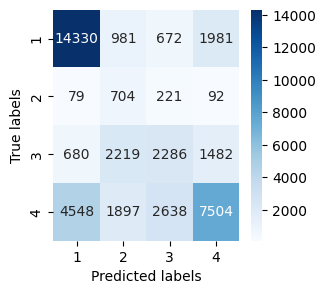

In [31]:
# Chargement du fichier CSV
results_df = pd.read_csv('resultats_fabien/random_search_over_results_max.csv')

best_index = results_df['F1_class_2'].idxmax()

# Récupération de la ligne correspondant au meilleur index
best_row = results_df.iloc[best_index]

# Extraction et affichage des hyperparamètres
best_params = {
    "C": best_row['C'],
    "max_iter": best_row['max_iter'],
    "multi_class": best_row['multi_class'],
    "penalty": best_row['penalty'],
    "solver": best_row['solver'],
    "l1_ratio": best_row['l1_ratio'] if not pd.isna(best_row['l1_ratio']) else None
}

# Impression des meilleurs hyperparamètres
print("Les meilleurs hyperparamètres sont :")
print(best_params)

# Entraînement du modèle avec les meilleurs paramètres trouvés
log_model_best = LogisticRegression(**best_params, random_state=42)
log_model_best.fit(X_train_os, y_train_os)

# Enregistrement du modèle
joblib.dump(log_model_best, f"modeles_fabien/best_random_over_model.joblib")

# Prédiction des classes pour l'ensemble de test
y_pred = log_model_best.predict(X_test)

# Calcul de la matrice de confusion en spécifiant les labels
labels = [1, 2, 3, 4]
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

# 4. Affichage de la matrice de confusion avec les labels appropriés
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# 10m 53.2s

In [32]:
# Obtention du rapport de classification
report = classification_report(y_test, y_pred, labels=[1, 2, 3, 4], target_names=["Class 1", "Class 2", "Class 3", "Class 4"], digits = 5)
print(report)

              precision    recall  f1-score   support

     Class 1    0.72974   0.79771   0.76221     17964
     Class 2    0.12136   0.64234   0.20415      1096
     Class 3    0.39299   0.34288   0.36623      6667
     Class 4    0.67854   0.45240   0.54286     16587

    accuracy                        0.58666     42314
   macro avg    0.48066   0.55883   0.46886     42314
weighted avg    0.64086   0.58666   0.59938     42314



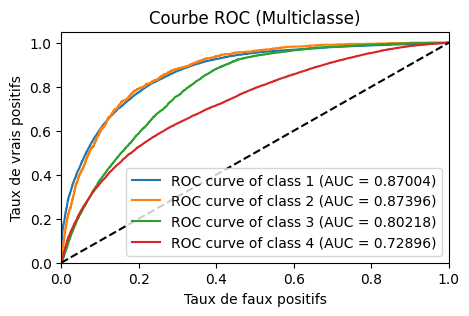

In [33]:
# Binarisation des étiquettes dans un format one-vs-all
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4])
y_score = log_model_best.predict_proba(X_test)

n_classes = 4
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calcul de la courbe ROC et de l'AUC pour chaque classe
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_score[:, i])

# Traçage de la courbe ROC pour chaque classe
plt.figure(figsize=(5, 3))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i+1} (AUC = {roc_auc[i]:.5f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC (Multiclasse)')
plt.legend(loc="lower right")
plt.show()

In [34]:
# Obtention des coefficients
coefficients = log_model_best.coef_

# Création d'un DataFrame pour afficher les coefficients
coeff_df = pd.DataFrame(coefficients, columns = X_train.columns)
import matplotlib.pyplot as plt
import numpy as np

# Obtention des coefficients
coefficients = log_model_best.coef_[0]

# Création d'un DataFrame pour afficher les coefficients absolus
abs_coeff_df = pd.DataFrame(np.abs(coefficients), index = X_train.columns, columns=['Abs_Coefficient'])

# Tri des valeurs par importance
sorted_coeff_df = abs_coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

sorted_coeff_df.head(10)

,Abs_Coefficient
catu_3,7.147257
obsm_1.0,3.824242
catv_2.0,2.619634
catv_3.0,2.444301
manv_22.0,2.393373
obsm_4.0,2.121829
obs_2.0,1.902872
age_usag_75-plus,1.863647
obs_6.0,1.742331
catv_4.0,1.594390


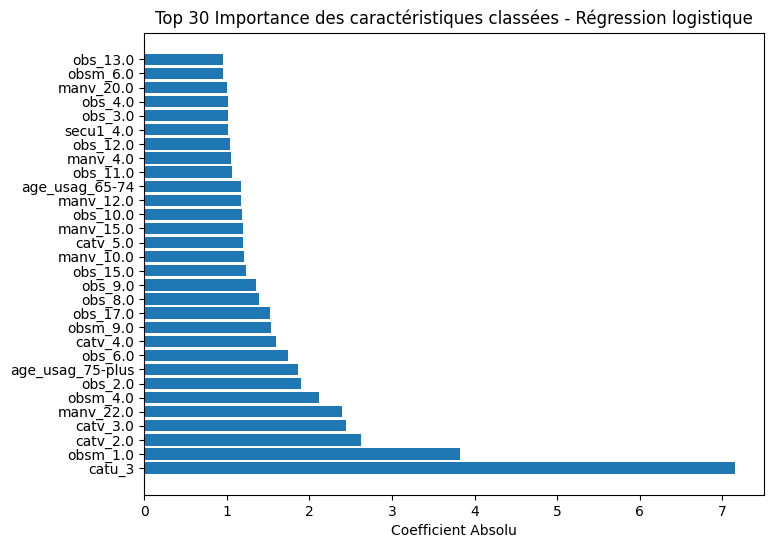

In [35]:
# Sélection des 30 premières valeurs
top_30_df = sorted_coeff_df.head(30)

# graphique à barres horizontales des coefficients
plt.figure(figsize=(8, 6))
plt.barh(top_30_df.index, top_30_df['Abs_Coefficient'])
plt.xlabel('Coefficient Absolu')
plt.title('Top 30 Importance des caractéristiques classées - Régression logistique')
plt.show()

## 6. RandomSearchCV SMOTE

#### Résultat brut

In [ ]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [28]:
def my_metric(y_true, y_pred):
    f1_score_class_2 = f1_score(y_true, y_pred, labels=[2], average=None)[0]
    f1_score_class_3 = f1_score(y_true, y_pred, labels=[3], average=None)[0]
    return (1.5 * f1_score_class_2 + f1_score_class_3) / 2.5

def f1_score_class_2(y_true, y_pred):
    return f1_score(y_true, y_pred, labels=[2], average=None)

def recall_score_class_2(y_true, y_pred):
    return recall_score(y_true, y_pred, labels=[2], average=None)

def precision_score_class_2(y_true, y_pred):
    return precision_score(y_true, y_pred, labels=[2], average=None)

scoring = {
    'accuracy': 'accuracy',
    'F1_class_2': make_scorer(f1_score_class_2),
    'recall_class_2': make_scorer(recall_score_class_2),
    'precision_class_2': make_scorer(precision_score_class_2),
    
    'precision_macro': make_scorer(precision_score, average='macro'),
    'precision_micro': make_scorer(precision_score, average='micro'),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'recall_micro': make_scorer(recall_score, average='micro'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'f1_micro': make_scorer(f1_score, average='micro'),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'roc_auc': 'roc_auc_ovr', 
    'matthews_corrcoef': make_scorer(matthews_corrcoef),
    'Cust_metric': make_scorer(my_metric)
}

# Spécification des paramètres pour RandomizedSearchCV
param_distributions = [
    {
        'penalty': ['l1'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr"]
    },
    {
        'penalty': ['l2'],
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr", "multinomial"]
    },
    {
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'max_iter': [1000, 10000, 100000],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'multi_class': ["ovr", "multinomial"],
        'l1_ratio': [0.0, 0.5, 1.0]
    },
    {
        'penalty': [None],
        'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
        'max_iter': [1000, 10000, 100000],
        'multi_class': ["ovr", "multinomial"]
    }
]

log_model = LogisticRegression(random_state=42)
random_search = RandomizedSearchCV(log_model, param_distributions=param_distributions, n_iter=20, cv=3, verbose=2, n_jobs=-1, scoring=scoring, refit=False) # refit sur votre métrique personnalisée
random_search.fit(X_train_smote, y_train_smote)

# Conversion des résultats en DataFrame
results_df = pd.DataFrame(random_search.cv_results_)

# Sauvegarde du DataFrame en fichier CSV
results_df.to_csv('random_search_smote_results_brut.csv')

# Afficher les premières lignes du DataFrame
print(results_df.head())


Fitting 3 folds for each of 20 candidates, totalling 60 fits
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_solver  \
0    1267.855073    155.794235         3.078039        0.149325         saga   
1    2583.499100    369.196757         2.416621        0.141160         saga   
2      76.302612      6.062106         2.538610        0.185988          sag   
3    1215.139391    281.857177         2.787814        0.292888    liblinear   
4     211.253575     11.207000         3.484475        0.337776    newton-cg   

  param_penalty param_multi_class param_max_iter param_C param_l1_ratio  \
0            l2               ovr         100000       1            NaN   
1            l1               ovr          10000       1            NaN   
2            l2               ovr          10000    0.01            NaN   
3            l1               ovr           1000       1            NaN   
4            l2               ovr           1000   0.001            NaN   

       

#### Résultat net

In [29]:
# Récupération des résultats obtenus par gridsearch
resultats = pd.DataFrame(random_search.cv_results_) # Correction de random_search en grid_model

# Étape 1: Chargement du fichier CSV
#resultats = pd.read_csv("grid_search_results_brut.csv")

# Extraction des colonnes 'param_' du dataframe de résultats
colonnes_parametres = [col for col in resultats.columns if col.startswith('param_')]
df_param = resultats[colonnes_parametres]

# Renommage des colonnes de df_param
noms_parametres = [col.replace('param_', '') for col in colonnes_parametres]
df_param.columns = noms_parametres

# Extraction des colonnes "param_" du dataframe de résultats
colonnes_scoring = [col for col in resultats.columns if col.startswith('mean_test_')]
df_scoring = resultats[colonnes_scoring]

# Renommage des colonnes de df_scoring
noms_scoring = [col.replace('mean_test_', '') for col in colonnes_scoring]
df_scoring.columns = noms_scoring

# Concatenation des deux dataframe
df_resultat = pd.concat([df_param, df_scoring], axis=1)

# Sauvegarde du DataFrame en fichier CSV
path = 'random_search_smote_results_net.csv'
df_resultat.to_csv(path, index=False)

# Affichage des premières lignes du DataFrame
df_resultat.head(10)

,solver,penalty,multi_class,max_iter,C,l1_ratio,accuracy,precision_macro,precision_micro,precision_weighted,recall_macro,recall_micro,recall_weighted,f1_macro,f1_micro,f1_weighted,roc_auc,matthews_corrcoef,Cust_metric,F1_class_2_macro,F1_class_2_weighted,F1_class_2_micro
0,saga,l2,ovr,100000,1,NaN,0.609411,0.609457,0.609411,0.609457,0.609411,0.609411,0.609411,0.583274,0.609411,0.583274,0.844959,0.496460,0.560296,0.734785,0.734785,0.734785
1,saga,l1,ovr,10000,1,NaN,0.609405,0.609412,0.609405,0.609412,0.609405,0.609405,0.609405,0.583223,0.609405,0.583223,0.844739,0.496462,0.560228,0.734834,0.734834,0.734834
2,sag,l2,ovr,10000,0.01,NaN,0.607495,0.606945,0.607495,0.606945,0.607495,0.607495,0.607495,0.581337,0.607495,0.581337,0.845246,0.493341,0.560057,0.733432,0.733432,0.733432
3,liblinear,l1,ovr,1000,1,NaN,0.609521,0.609577,0.609521,0.609577,0.609521,0.609521,0.609521,0.583358,0.609521,0.583358,0.844820,0.496615,0.560426,0.734963,0.734963,0.734963
4,newton-cg,l2,ovr,1000,0.001,NaN,0.597246,0.591079,0.597246,0.591079,0.597246,0.597246,0.597246,0.572528,0.597246,0.572528,0.838106,0.475832,0.555587,0.717147,0.717147,0.717147
5,lbfgs,l2,ovr,10000,0.1,NaN,0.609069,0.609204,0.609069,0.609204,0.609069,0.609069,0.609069,0.582944,0.609069,0.582944,0.845568,0.495984,0.560209,0.734472,0.734472,0.734472
6,saga,elasticnet,ovr,1000,10,0.5,0.609451,0.609439,0.609451,0.609439,0.609451,0.609451,0.609451,0.583267,0.609451,0.583267,0.844613,0.496531,0.560268,0.734913,0.734913,0.734913
7,saga,elasticnet,ovr,10000,0.001,0.5,0.589949,0.581030,0.589949,0.581030,0.589949,0.589949,0.589949,0.567186,0.589949,0.567186,0.832368,0.463615,0.555797,0.706071,0.706071,0.706071
8,saga,l2,multinomial,100000,1,NaN,0.622731,0.632582,0.622731,0.632582,0.622731,0.622731,0.622731,0.609026,0.622731,0.609026,0.860621,0.507289,0.602622,0.738397,0.738397,0.738397
9,sag,l2,multinomial,1000,0.001,NaN,0.605486,0.604753,0.605486,0.604753,0.605486,0.605486,0.605486,0.589348,0.605486,0.589348,0.848796,0.482988,0.581923,0.720890,0.720890,0.720890


#### Résultats Max

In [30]:
# Index des maxima des différents scoring
index_max_MCC = df_resultat['matthews_corrcoef'].idxmax()
index_max_F1_class_2 = df_resultat['F1_class_2'].idxmax()
index_max_recall_class_2 = df_resultat['recall_class_2'].idxmax()
index_max_precision_class_2 = df_resultat['precision_class_2'].idxmax()
index_max_cust = df_resultat['Cust_metric'].idxmax()

index_max_recall_macro = df_resultat['recall_macro'].idxmax()
index_max_recall_micro = df_resultat['recall_micro'].idxmax()
index_max_recall_weighted = df_resultat['recall_weighted'].idxmax()
index_max_f1_macro = df_resultat['f1_macro'].idxmax()
index_max_f1_micro = df_resultat['f1_micro'].idxmax()
index_max_f1_weighted = df_resultat['f1_weighted'].idxmax()

# Extraction des lignes correspondantes
df_resultat_max = df_resultat.loc[[index_max_F1_class_2, index_max_recall_class_2, index_max_precision_class_2,index_max_MCC,
                             index_max_cust, index_max_recall_macro, index_max_recall_micro, index_max_recall_weighted,
                             index_max_f1_macro, index_max_f1_micro, index_max_f1_weighted]]

# Affichage
df_resultat_max.head()

# Sauvegarde du DataFrame en fichier CSV
path = 'random_search_smote_results_max.csv'
df_resultat_max.to_csv(path, index=False)

#print(df_resultat_max.head)
print(df_resultat_max.to_string())
from IPython.display import display

display(df_resultat_max)
df_resultat_max.to_html('df_resultat_max.html')

  solver penalty  multi_class max_iter  C l1_ratio  accuracy  precision_macro  precision_micro  precision_weighted  recall_macro  recall_micro  recall_weighted  f1_macro  f1_micro  f1_weighted   roc_auc  matthews_corrcoef  Cust_metric  F1_class_2_macro  F1_class_2_weighted  F1_class_2_micro
8   saga      l2  multinomial   100000  1      NaN  0.622731         0.632582         0.622731            0.632582      0.622731      0.622731         0.622731  0.609026  0.622731     0.609026  0.860621           0.507289     0.602622          0.738397             0.738397          0.738397
8   saga      l2  multinomial   100000  1      NaN  0.622731         0.632582         0.622731            0.632582      0.622731      0.622731         0.622731  0.609026  0.622731     0.609026  0.860621           0.507289     0.602622          0.738397             0.738397          0.738397
8   saga      l2  multinomial   100000  1      NaN  0.622731         0.632582         0.622731            0.632582      0.62

,solver,penalty,multi_class,max_iter,C,l1_ratio,accuracy,precision_macro,precision_micro,precision_weighted,recall_macro,recall_micro,recall_weighted,f1_macro,f1_micro,f1_weighted,roc_auc,matthews_corrcoef,Cust_metric,F1_class_2_macro,F1_class_2_weighted,F1_class_2_micro
8,saga,l2,multinomial,100000,1,NaN,0.622731,0.632582,0.622731,0.632582,0.622731,0.622731,0.622731,0.609026,0.622731,0.609026,0.860621,0.507289,0.602622,0.738397,0.738397,0.738397
8,saga,l2,multinomial,100000,1,NaN,0.622731,0.632582,0.622731,0.632582,0.622731,0.622731,0.622731,0.609026,0.622731,0.609026,0.860621,0.507289,0.602622,0.738397,0.738397,0.738397
8,saga,l2,multinomial,100000,1,NaN,0.622731,0.632582,0.622731,0.632582,0.622731,0.622731,0.622731,0.609026,0.622731,0.609026,0.860621,0.507289,0.602622,0.738397,0.738397,0.738397
8,saga,l2,multinomial,100000,1,NaN,0.622731,0.632582,0.622731,0.632582,0.622731,0.622731,0.622731,0.609026,0.622731,0.609026,0.860621,0.507289,0.602622,0.738397,0.738397,0.738397
8,saga,l2,multinomial,100000,1,NaN,0.622731,0.632582,0.622731,0.632582,0.622731,0.622731,0.622731,0.609026,0.622731,0.609026,0.860621,0.507289,0.602622,0.738397,0.738397,0.738397
8,saga,l2,multinomial,100000,1,NaN,0.622731,0.632582,0.622731,0.632582,0.622731,0.622731,0.622731,0.609026,0.622731,0.609026,0.860621,0.507289,0.602622,0.738397,0.738397,0.738397
8,saga,l2,multinomial,100000,1,NaN,0.622731,0.632582,0.622731,0.632582,0.622731,0.622731,0.622731,0.609026,0.622731,0.609026,0.860621,0.507289,0.602622,0.738397,0.738397,0.738397
8,saga,l2,multinomial,100000,1,NaN,0.622731,0.632582,0.622731,0.632582,0.622731,0.622731,0.622731,0.609026,0.622731,0.609026,0.860621,0.507289,0.602622,0.738397,0.738397,0.738397


#### Entrainement du modèle avec les meilleurs paramètres

Les meilleurs paramètres sont :
solver: saga
penalty: l2
multi_class: multinomial
max_iter: 100000
C: 1


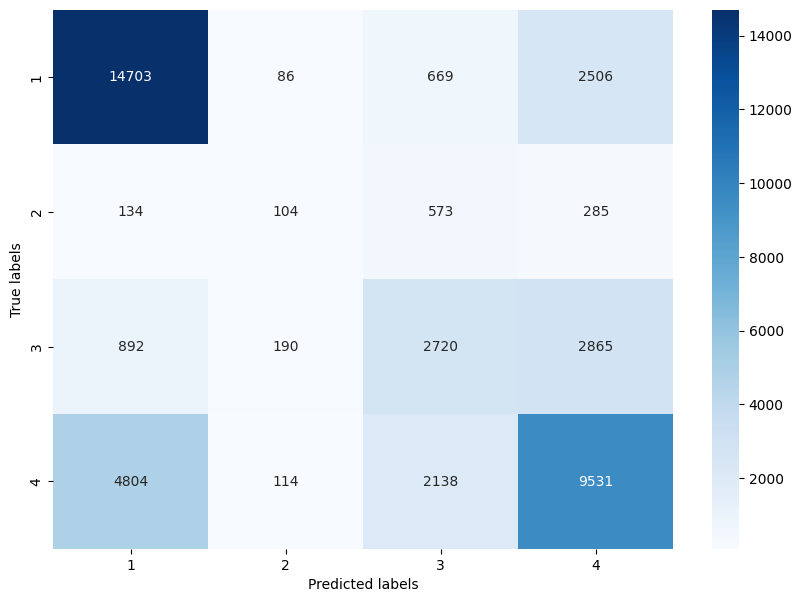

              precision    recall  f1-score   support

     Class 1       0.72      0.82      0.76     17964
     Class 2       0.21      0.09      0.13      1096
     Class 3       0.45      0.41      0.43      6667
     Class 4       0.63      0.57      0.60     16587

    accuracy                           0.64     42314
   macro avg       0.50      0.47      0.48     42314
weighted avg       0.63      0.64      0.63     42314



In [31]:

# Récupération de l'index du meilleur score pour "mean_test_F1_class_2_macro"
best_index = results_df['mean_test_F1_class_2_macro'].idxmax()

# Extraction des meilleurs paramètres
best_params = results_df.loc[best_index, 'params']

# Affichage des meilleurs paramètres
print("Les meilleurs paramètres sont :")
for key, value in best_params.items():
    print(f"{key}: {value}")

# Entrainement ldu modèle avec les meilleurs paramètres
best_log_model = LogisticRegression(**best_params, random_state=42)
best_log_model.fit(X_train_smote, y_train_smote)
y_pred = best_log_model.predict(X_test)

# Affichage de la matrice de confusion
labels = [1, 2, 3, 4]
conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Rapport de classification
report = classification_report(y_test, y_pred, labels=labels, target_names=["Class 1", "Class 2", "Class 3", "Class 4"])
print(report)


## 7. Algorithme de boosting : Adaboost

#### Adaboost

Les meilleurs hyperparamètres sont :
LogisticRegression(C=10.0, max_iter=10000, multi_class='ovr', n_jobs=-1,
                   penalty='l1', solver='saga')


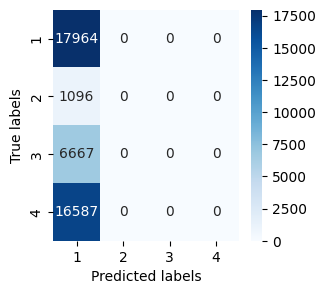

Rapport de classification pour AdaBoost:
              precision    recall  f1-score   support

     Class 1       0.42      1.00      0.60     17964
     Class 2       0.00      0.00      0.00      1096
     Class 3       0.00      0.00      0.00      6667
     Class 4       0.00      0.00      0.00     16587

    accuracy                           0.42     42314
   macro avg       0.11      0.25      0.15     42314
weighted avg       0.18      0.42      0.25     42314



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [9]:
# Application de l'échantillonnage aléatoire pour équilibrer les classes dans l'ensemble d'entraînement
# ros = RandomOverSampler()
# X_train_os, y_train_os = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
X_train_us, y_train_us = rus.fit_resample(X_train, y_train)

# Chargement du fichier CSV
results_df = pd.read_csv('resultats_fabien/grid_search_under_results_max.csv')

best_index = results_df['F1_class_2'].idxmax()

# Récupération de la ligne correspondant au meilleur index
best_row = results_df.iloc[best_index]

# Utilisation des best_params pour créer le meilleur estimateur
best_estimator = LogisticRegression(
    C=best_row['C'],
    # max_iter=best_row['max_iter'],
    max_iter=10000,
    multi_class=best_row['multi_class'],
    penalty=best_row['penalty'],
    solver=best_row['solver'],
    n_jobs=-1,
    l1_ratio=best_row['l1_ratio'] if not pd.isna(best_row['l1_ratio']) else None
)

# Impression des meilleurs hyperparamètres
print("Les meilleurs hyperparamètres sont :")
print(best_estimator)

# Entraînement et évaluation du modèle AdaBoost
ada = AdaBoostClassifier(best_estimator, n_estimators=2, algorithm="SAMME.R", learning_rate=0.01)
ada.fit(X_train_us, y_train_us)
dump(ada, 'modeles_fabien/Adaboost_dump.joblib')
y_test_pred_ada = ada.predict(X_test)

# Affichage de la matrice de confusion pour AdaBoost
labels = [1, 2, 3, 4]
conf_matrix = confusion_matrix(y_test, y_test_pred_ada, labels=labels)
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Rapport de classification pour AdaBoost
print("Rapport de classification pour AdaBoost:")
report = classification_report(y_test, y_test_pred_ada, labels=labels, target_names=["Class 1", "Class 2", "Class 3", "Class 4"])
print(report)


## 8. Algorithme de bagging : undersampling

Les meilleurs hyperparamètres sont :
LogisticRegression(max_iter=10000, multi_class='ovr', solver='sag')
Moyenne accuracy: 0.5511450958168153

Moyenne F1_class_2: 0.5908266798289125

Moyenne recall_class_2: 0.6325865315689553

Moyenne precision_class_2: 0.5542527936723034

Moyenne precision_macro: 0.538446471198048

Moyenne recall_macro: 0.5511445153674571

Moyenne f1_macro: 0.539866224632279

Moyenne roc_auc: 0.8037834087056551

Moyenne matthews_corrcoef: 0.4040000958131335

Moyenne Cust_metric: 0.5106866256370349



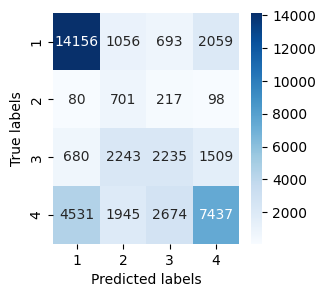

Rapport de classification pour le modèle avec Bagging:
              precision    recall  f1-score   support

     Class 1    0.72793   0.78802   0.75678     17964
     Class 2    0.11791   0.63960   0.19912      1096
     Class 3    0.38409   0.33523   0.35800      6667
     Class 4    0.66982   0.44836   0.53716     16587

    accuracy                        0.57969     42314
   macro avg    0.47494   0.55280   0.46277     42314
weighted avg    0.63517   0.57969   0.59342     42314



In [13]:
# Application de l'échantillonnage aléatoire pour équilibrer les classes dans l'ensemble d'entraînement
rus = RandomUnderSampler()
X_train_us, y_train_us = rus.fit_resample(X_train, y_train)

# Chargement du fichier CSV
results_df = pd.read_csv('resultats_fabien/grid_search_under_results_max.csv')

# Récupération de la ligne correspondant au meilleur index
best_index = results_df['F1_class_2'].idxmax()
best_row = results_df.iloc[best_index]

# Utilisation des hyperparamètres trouvés pour créer le meilleur estimateur de régression logistique
best_estimator = LogisticRegression(
    C=best_row['C'],
    max_iter=10000,
    multi_class=best_row['multi_class'],
    penalty=best_row['penalty'],
    solver=best_row['solver'],
    l1_ratio=best_row['l1_ratio'] if not pd.isna(best_row['l1_ratio']) else None
)

# Impression des meilleurs hyperparamètres
print("Les meilleurs hyperparamètres sont :")
print(best_estimator)

# Définition des métriques personnalisées
def my_metric(y_true, y_pred):
    f1_score_class_2 = f1_score(y_true, y_pred, labels=[2], average=None)[0]
    f1_score_class_3 = f1_score(y_true, y_pred, labels=[3], average=None)[0]
    return (1.5 * f1_score_class_2 + f1_score_class_3) / 2.5

def f1_score_class_2(y_true, y_pred):
    return f1_score(y_true, y_pred, labels=[2], average=None)[0]

def recall_score_class_2(y_true, y_pred):
    return recall_score(y_true, y_pred, labels=[2], average=None)[0]

def precision_score_class_2(y_true, y_pred):
    return precision_score(y_true, y_pred, labels=[2], average=None)[0]

scoring = {
    'accuracy': 'accuracy',
    'F1_class_2': make_scorer(f1_score_class_2),
    'recall_class_2': make_scorer(recall_score_class_2),
    'precision_class_2': make_scorer(precision_score_class_2),
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro',
    'roc_auc': 'roc_auc_ovr',
    'matthews_corrcoef': make_scorer(matthews_corrcoef),
    'Cust_metric': make_scorer(my_metric)
}

# Utilisation du Bagging avec l'estimateur optimisé
bagging_clf = BaggingClassifier(estimator=best_estimator, n_estimators=5, random_state=42)
cv_results = cross_validate(bagging_clf, X_train_us, y_train_us, cv=3, scoring=scoring)

# Affichage des moyennes pour toutes les métriques
for metric in scoring.keys():
    mean_score = np.mean(cv_results['test_' + metric])
    print(f"Moyenne {metric}: {mean_score}\n")

# Conversion des résultats en DataFrame
results_df = pd.DataFrame(cv_results)

# Sauvegarde du DataFrame en fichier CSV
results_df.to_csv('resultats_fabien/bagging_under_results.csv')

# Entraînement du classificateur Bagging sur le jeu de données d'entraînement
bagging_clf.fit(X_train_us, y_train_us)

# Sauvegarde du modèle entraîné
dump(bagging_clf, 'modeles_fabien/Bagging_under_best_model.joblib')

# prédiction des étiquettes du jeu de données de test
y_pred_bagging = bagging_clf.predict(X_test)

# Affichage de la matrice de confusion sous forme de heatmap
labels = [1, 2, 3, 4]
conf_matrix = confusion_matrix(y_test, y_pred_bagging, labels=labels)
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Génération et affichage du rapport de classification
print("Rapport de classification pour le modèle avec Bagging:")
report = classification_report(y_test, y_pred_bagging, labels=labels, target_names=["Class 1", "Class 2", "Class 3", "Class 4"], digits=5)
print(report)

# temps d'exécution under 19m 25.6s

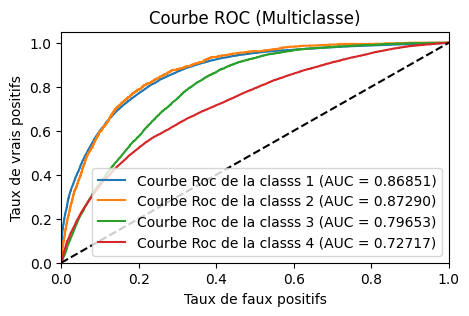

In [14]:
# Binarisation des étiquettes dans un format one-vs-all
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4])
y_score = bagging_clf.predict_proba(X_test)

n_classes = 4
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calcul de la courbe ROC et de l'AUC pour chaque classe
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_score[:, i])

# Traçage de la courbe ROC pour chaque classe
plt.figure(figsize=(5, 3))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Courbe Roc de la classs {i+1} (AUC = {roc_auc[i]:.5f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC (Multiclasse)')
plt.legend(loc="lower right")
plt.show()

## 9. Algorithme de bagging : oversampling

Les meilleurs hyperparamètres sont :
LogisticRegression(C=0.1, max_iter=10000, multi_class='ovr', penalty='l1',
                   solver='liblinear')
Moyenne accuracy: 0.556853466938826

Moyenne F1_class_2: 0.5985371507867104

Moyenne recall_class_2: 0.643322818086225

Moyenne precision_class_2: 0.559581795741426

Moyenne precision_macro: 0.5445949051865825

Moyenne recall_macro: 0.556853466938826

Moyenne f1_macro: 0.5448425557728872

Moyenne roc_auc: 0.8088293115035413

Moyenne matthews_corrcoef: 0.412095933122746

Moyenne Cust_metric: 0.5180822053825929



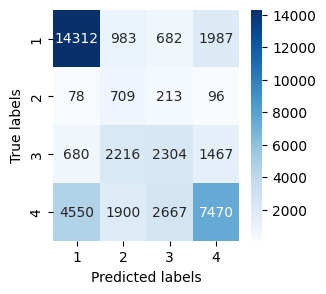

Rapport de classification pour le modèle avec Bagging:
              precision    recall  f1-score   support

     Class 1    0.72946   0.79670   0.76160     17964
     Class 2    0.12207   0.64690   0.20539      1096
     Class 3    0.39277   0.34558   0.36767      6667
     Class 4    0.67786   0.45035   0.54117     16587

    accuracy                        0.58598     42314
   macro avg    0.48054   0.55988   0.46896     42314
weighted avg    0.64045   0.58598   0.59872     42314



In [11]:
# Application de l'échantillonnage aléatoire pour équilibrer les classes dans l'ensemble d'entraînement
ros = RandomOverSampler()
X_train_os, y_train_os = ros.fit_resample(X_train, y_train) 

# Chargement du fichier CSV
results_df = pd.read_csv('resultats_fabien/random_search_over_results_max.csv')

# Récupération de la ligne correspondant au meilleur index
best_index = results_df['F1_class_2'].idxmax()
best_row = results_df.iloc[best_index]

# Utilisation des hyperparamètres trouvés pour créer le meilleur estimateur de régression logistique
best_estimator = LogisticRegression(
    C=best_row['C'],
    max_iter=10000,
    multi_class=best_row['multi_class'],
    penalty=best_row['penalty'],
    solver=best_row['solver'],
    l1_ratio=best_row['l1_ratio'] if not pd.isna(best_row['l1_ratio']) else None
)

# Impression des meilleurs hyperparamètres
print("Les meilleurs hyperparamètres sont :")
print(best_estimator)

# Définition des métriques personnalisées
def my_metric(y_true, y_pred):
    f1_score_class_2 = f1_score(y_true, y_pred, labels=[2], average=None)[0]
    f1_score_class_3 = f1_score(y_true, y_pred, labels=[3], average=None)[0]
    return (1.5 * f1_score_class_2 + f1_score_class_3) / 2.5

def f1_score_class_2(y_true, y_pred):
    return f1_score(y_true, y_pred, labels=[2], average=None)[0]

def recall_score_class_2(y_true, y_pred):
    return recall_score(y_true, y_pred, labels=[2], average=None)[0]

def precision_score_class_2(y_true, y_pred):
    return precision_score(y_true, y_pred, labels=[2], average=None)[0]

scoring = {
    'accuracy': 'accuracy',
    'F1_class_2': make_scorer(f1_score_class_2),
    'recall_class_2': make_scorer(recall_score_class_2),
    'precision_class_2': make_scorer(precision_score_class_2),
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro',
    'roc_auc': 'roc_auc_ovr',
    'matthews_corrcoef': make_scorer(matthews_corrcoef),
    'Cust_metric': make_scorer(my_metric)
}

# Utilisation du Bagging avec l'estimateur optimisé
bagging_clf = BaggingClassifier(estimator=best_estimator, n_estimators=5, random_state=42)
cv_results = cross_validate(bagging_clf, X_train_os, y_train_os, cv=3, scoring=scoring)

# Affichage des moyennes pour toutes les métriques
for metric in scoring.keys():
    mean_score = np.mean(cv_results['test_' + metric])
    print(f"Moyenne {metric}: {mean_score}\n")

# Conversion des résultats en DataFrame
results_df = pd.DataFrame(cv_results)

# Sauvegarde du DataFrame en fichier CSV
results_df.to_csv('resultats_fabien/bagging_over_results.csv')

# Entraînement du classificateur Bagging sur le jeu de données d'entraînement
bagging_clf.fit(X_train_os, y_train_os)

# Sauvegarde du modèle entraîné
dump(bagging_clf, 'modeles_fabien/Bagging_over_best_model.joblib')

# prédiction des étiquettes du jeu de données de test
y_pred_bagging = bagging_clf.predict(X_test)

# Affichage de la matrice de confusion sous forme de heatmap
labels = [1, 2, 3, 4]
conf_matrix = confusion_matrix(y_test, y_pred_bagging, labels=labels)
plt.figure(figsize=(3,3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Génération et affichage du rapport de classification
print("Rapport de classification pour le modèle avec Bagging:")
report = classification_report(y_test, y_pred_bagging, labels=labels, target_names=["Class 1", "Class 2", "Class 3", "Class 4"], digits=5)
print(report)

# temps d'exécution over 83m 59.9s

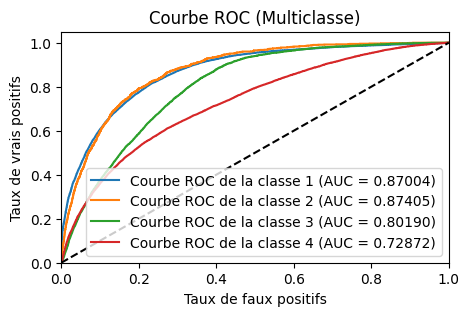

In [12]:
# Binarisation des étiquettes dans un format one-vs-all
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4])
y_score = bagging_clf.predict_proba(X_test)

n_classes = 4
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calcul de la courbe ROC et de l'AUC pour chaque classe
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_score[:, i])

# Traçage de la courbe ROC pour chaque classe
plt.figure(figsize=(5, 3))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Courbe ROC de la classe {i+1} (AUC = {roc_auc[i]:.5f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC (Multiclasse)')
plt.legend(loc="lower right")
plt.show()    

## 10. Shap

C: 0.1
class_weight: None
dual: False
fit_intercept: True
intercept_scaling: 1
l1_ratio: None
max_iter: 1000
multi_class: ovr
n_jobs: None
penalty: l1
random_state: 42
solver: liblinear
tol: 0.0001
verbose: 0
warm_start: False
classe 1:


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


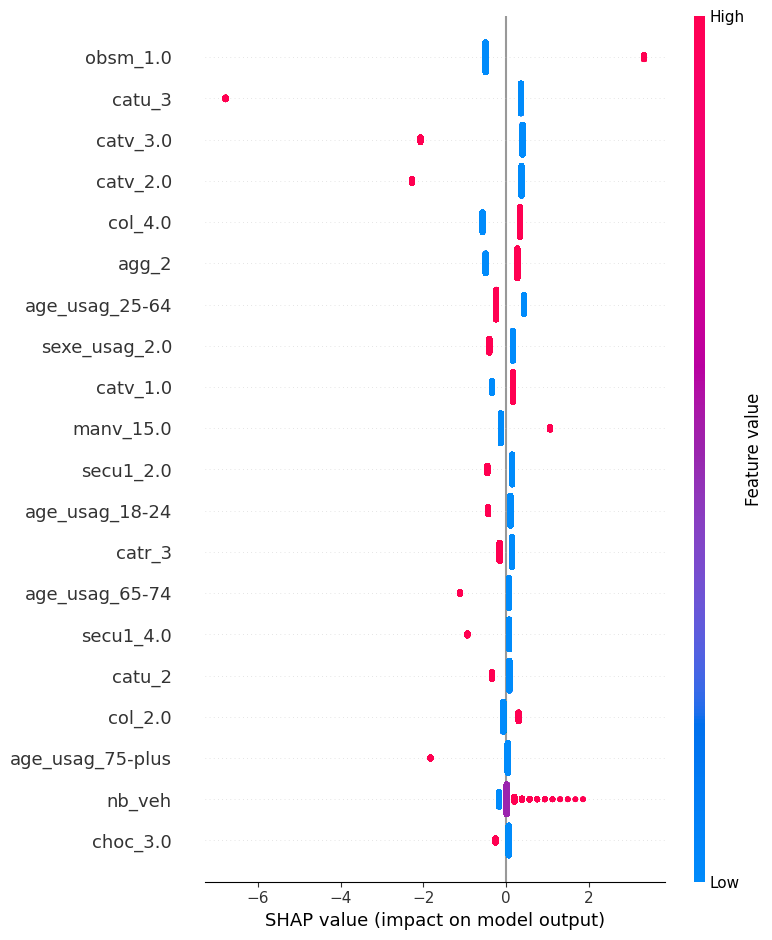

classe 2:


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


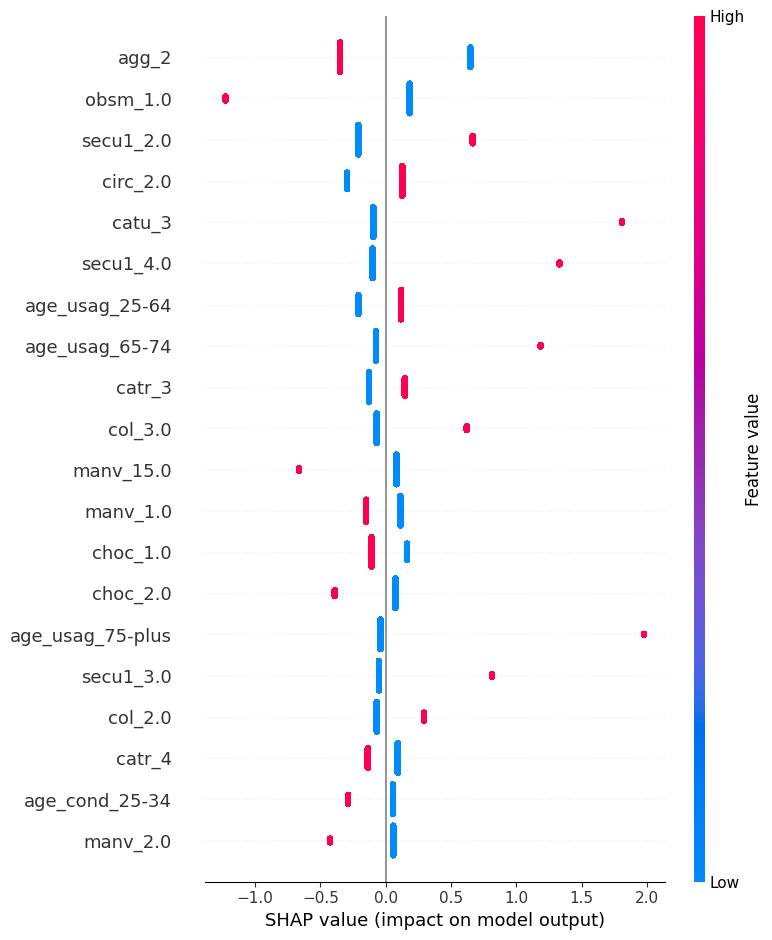

classe 3:


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


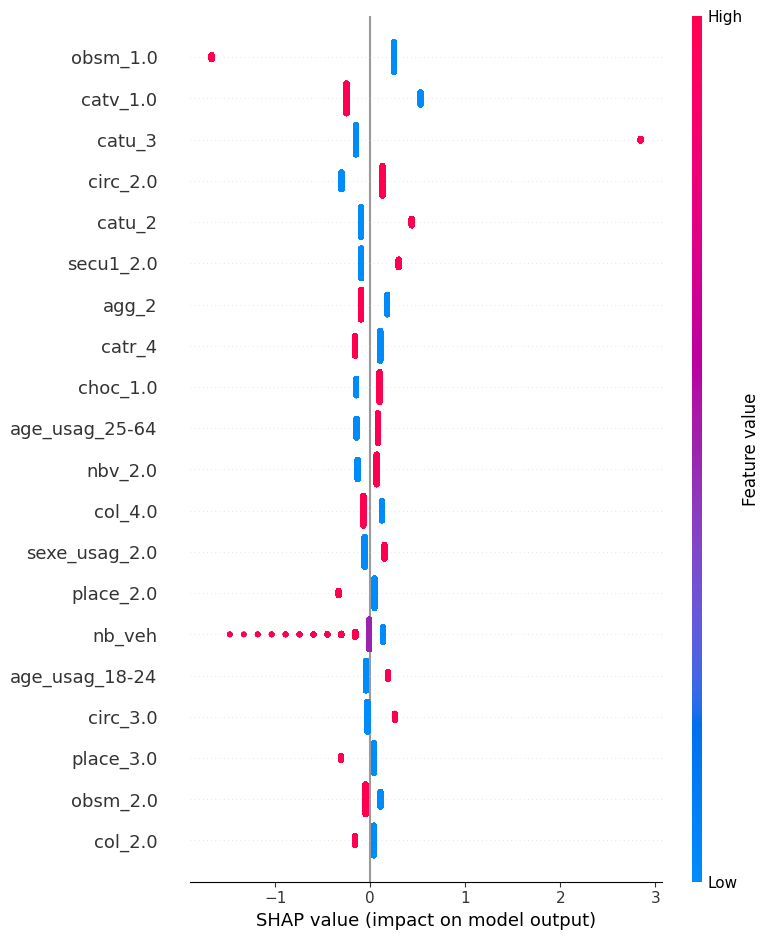

classe 4:


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


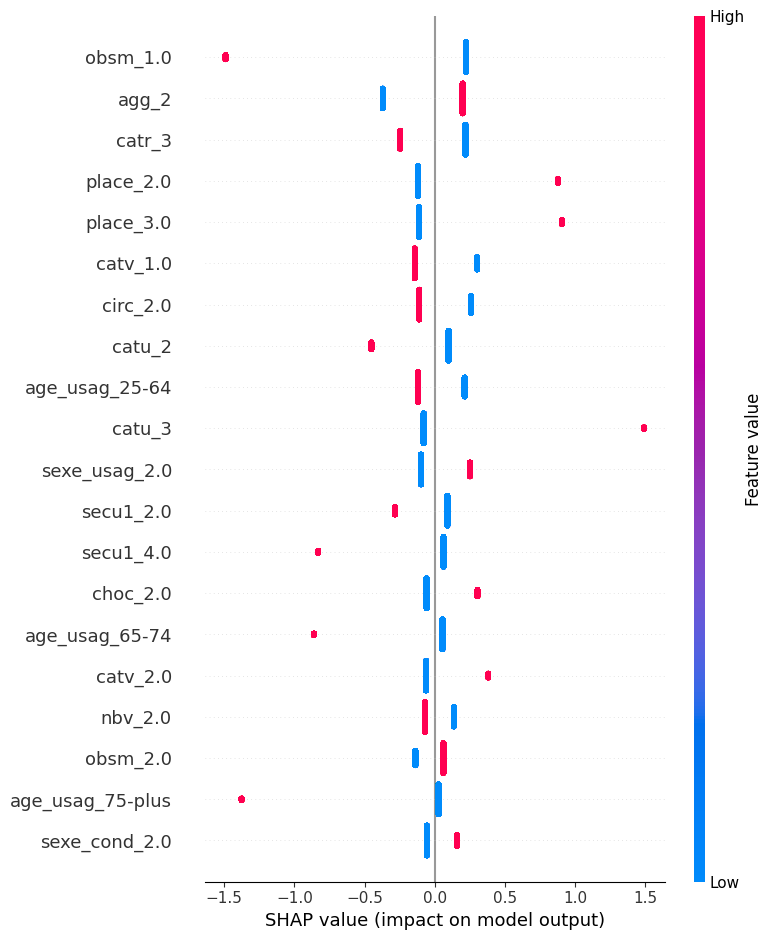

Shape of shap_values: (42314, 181, 4)
Shape of X_test: (42314, 181)


In [16]:
# Récupération du meilleur modèle
best_model = load('modeles_fabien/best_random_over_model.joblib')

# Affichage des hyperparamètres
params = best_model.get_params()
for param, value in params.items():
    print(f"{param}: {value}")

# Création d'un explainer SHAP
explainer = shap.Explainer(best_model, X_train)

# Affichage d'un résumé pour chaque classe
for i in range(shap_values.shape[2]):
    classe = i + 1
    print(f"classe {classe}:")
    shap.summary_plot(shap_values[:,:,i], X_test)

print("Shape of shap_values:", shap_values.shape)
print("Shape of X_test:", X_test.shape)


# 19.3 s